Available Themes: 
- chesterish
- grade3
- gruvboxd
- gruvboxl
    color beach, letras negras
- monokai
- oceans16
- onedork
- solarizedd
- solarizedl
    color beach mas claro

In [1]:
# !jt -l
# !jt -t solarizedl -T
# !jt -r

# Inicio



__Rename__
Recordar que la columna llamada

- `Precio promedio` ahora es `Precio`
- `Centro.1` ahora es `Centro`
- `Centro` ahora es `Centro_Cod`

Presenta los parametros del modelo:

- Dirección datos
- Dirección Graficos
- _Material a analizar_
- _Canal a analizar_
- _Zona de los Datos_
- _Año de inicio de analizis_

Base de datos


`Tipo_de_Cliente`
`Y_producto`
`Año_inicio`

`file_direct_Graphic` 

## Parametros 
data frame `data_i`


> - Producto `i_producto = Y_producto`
> -Para el Canal `Tipo_de_Cliente`
> -Variable a predecir/Grafico `Y_Variable`

Columnas de interes para predecir `X_col`

Diccionario del grupo de columnas `Dic_col`

In [2]:
#===================================
# Archivo
#===================================
Zona_df='Z001'

#===================================
# Clientes
#===================================
Tipo_de_Cliente='Tradicional'

#===================================
# Producto de interes
#===================================
Y_producto='1010078'


#===================================
# Año de Partida
#===================================
Año_inicio='2018'




# Ordenador de escritorio

file_direct_O="C:/Users/user/Documents/Data/Data Clear/"+Zona_df+"/"
file_direct_Clear="C:/Users/user/Documents/Data/Data Clear/"
file_direct_Graphic='C:/Users/user/Documents/Graficos'
Png_file_direct_Graphic="C:\\Users\\user\\Documents\\Graficos"
file_direct_Result_Data="C:/Users/user/Documents/Data/Data Resultante/"+Zona_df+"/"

"""
#Notebook
file_direct_O="C:/Users/rolft/Documents/Repositorios/Data/Data Clear/"+Zona_df+"/"
file_direct_Clear="C:/Users/rolft/Documents/Repositorios/Data/Data Clear/"
file_direct_Graphic='C:/Users/rolft/Documents/Repositorios/Graficos'
Png_file_direct_Graphic='C:\\Users\\rolft\\Documents\\Repositorios\\Graficos'
"""

#Graficos
file_direct_Graphic_Canal=file_direct_Graphic+"/"+Tipo_de_Cliente
file_direct_Graphic_Canal_Material=file_direct_Graphic_Canal+'/'+Y_producto

Png_file_direct_Graphic_Canal=Png_file_direct_Graphic+'\\'+'Canal '+Tipo_de_Cliente
Png_file_direct_Graphic_Canal_Material=Png_file_direct_Graphic_Canal+'\\'+Y_producto


## Intalar paquetes, Abrir data y ajustarla 

#### Base Generales

In [3]:
#from adjustText import adjust_text
# from adjustText import *

In [4]:
#=====================================================
                # BASE 
#-----------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from geopandas import *

from plotnine import *

#para ajustar las fechas
import datetime

#para calcular el skew de un array() o list()
from scipy.stats import skew 

In [5]:
#=====================================================
                # sklearn 
#-----------------------------------------------------

#Separador de datos en train/test
from sklearn.model_selection import train_test_split

#Prediccion Ridge Regression
from sklearn.linear_model import Ridge

In [6]:
#=====================================================
                # statsmodels 
#-----------------------------------------------------
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning


#from statsmodels.regression.mixed_linear_model import MixedLMResults
# No se para qué sirve este

In [7]:
#====================================================
#librerias para crear division de series temporales
#====================================================

from mizani.breaks import date_breaks
from mizani.formatters import date_format

In [8]:
# stopwatch
import time
def time_convert(sec):
  mins = sec // 60
  sec = sec % 60
  hours = mins // 60
  mins = mins % 60
  print("Time Lapsed = {0}:{1}:{2}".format(int(hours),int(mins),sec),'\n H:m:s')
#==================================
#          Example
#    input("Press Enter to start")
start_time = time.time()
#    input("Press Enter to stop")
#    end_time = time.time()
#    time_lapsed = end_time - start_time
#    time_convert(time_lapsed)
#=================================

In [9]:
#Histograma con porcentajes
from mizani.formatters import percent_format

### Propios

In [10]:
import data_read as dr
import R_FM_Func

### Funciones Propias
```python
#Mes_name
data_i.Mes.apply(Mes_name)
```
>Transforma la columna mes numerica en el nombre del mes

#### Numero a Meses 

__Forma de crear una etiqueta para un valor especifico__
```python
#[Y_Graph]
dfz=df.copy()
dfz['Año select']=dfz.apply( lambda x: x['Año'] if x['Año']==2020 else '',axis=1)
dfz
```

In [11]:
#===================================
# Dicionario MES
#===================================

#===================================
# Fecha
D=['Enero','Febrero','Marzo','Abril',
 'Mayo','Junio','Julio','Agosto',
 'Septiembre','Octubre',
 'Noviembre','Diciembre']
Month_dic={i:D[i-1]  for i in range(1,13)}
Month_NUM_dic={ D[i-1]:i  for i in range(1,13)}
#===========================================


def Mes_name(x):
    D=['Enero','Febrero','Marzo','Abril',
    'Mayo','Junio','Julio','Agosto',
    'Septiembre','Octubre',
    'Noviembre','Diciembre']
    return(D[int(x)-1])

In [12]:
Month_NUM_dic

{'Enero': 1,
 'Febrero': 2,
 'Marzo': 3,
 'Abril': 4,
 'Mayo': 5,
 'Junio': 6,
 'Julio': 7,
 'Agosto': 8,
 'Septiembre': 9,
 'Octubre': 10,
 'Noviembre': 11,
 'Diciembre': 12}

#### Función estandariza ciertas columnas a LN 

In [13]:
# ['Frecuency Actual del Cliente','Monetary Actual']
def data_ln(dx,ln_col,drop_columns):
    """
    Pasa un listado de columnas a Ln
    
        dx: dataframe
        ln_col: (Array) Listado de columnas a escalar 
        drop_columns: (True or False)  Eliminar columnas del listado
    """
    df_x=dx.copy()
    for s in ln_col:
        if(s in df_x.columns):
            print(s)
            df_x[s + '(Escala ln)']=\
            df_x[s].apply(lambda x: np.log(x))
    if(drop_columns):
        df_x.drop(columns = ln_col)
    return(df_x)

## Dicionario 
rename aplicado a `Precio promedio`

In [14]:
Dic_col={'Base':
                             ['Material (Nombre)', 'Kilos Venta KG', 'Precio','Cliente'],
        'Fecha':
                             ['Día natural','Día Semana','Semana', 'Mes', 'Año'],
        'Ubicacion':
                             ['Centro','Población'],
        'Cliente Categoria':
                             ['Cluster','Segmento.1', 'Categoría Cliente'],
        'Cliente Atributos':
                             ['Año Creación', 'Material Favorito','Frecuencia Historica'] 
         ,'RFM Row':
                 ['Recency días','Frecuency_Row','Monetary']
        ,'RFM Customers':
                 ['Recency Actual','Frecuency Actual del Cliente','Monetary Actual']
        ,'Ticket Row':
                 ['Ticket Promedio','Ticket CV']
        ,'Ticket Customers':
                 ['Ticket Promedio Actual','Ticket CV Actual']
        }

### Colores 

[Link colores muestra y configuración](https://www.rapidtables.com/web/color/RGB_Color.html)

In [15]:
('{:X}{:X}{:X}').format(31, 119, 180)
('{:X}{:X}{:X}').format(219, 96, 97)
('{:X}{:X}{:X}').format(87, 219, 95)

'57DB5F'

## Datos
- `data_rfm`: Facturaciones 
- `Data_Customers_Full`: Clientes con todos los atributos
<!-- - `Df_Week`: Semanas, Con su respectivo cluster  -->

### Factuas con Week Tipe
`data_rfm`

In [16]:
data_rfm=dr.RFM_Data_func(file_direct_O)
data_rfm=dr.Ajuste_data_RFM(data_rfm)
data_rfm=dr.Merge_Week(file_direct_O,data_rfm)


C:/Users/user/Documents/Data/Data Clear/Z001/data_1010078_CT R.csv
R (198596, 19)
C:/Users/user/Documents/Data/Data Clear/Z001/data_1010078_CT F.csv
F (198596, 19)
C:/Users/user/Documents/Data/Data Clear/Z001/data_1010078_CT M.csv
M (198596, 20)
------------------------------------------------
Merge
RF (198596, 20)
RFM (198596, 22)
Material (Nombre)       object
Kilos Venta KG           int64
Precio                   int64
Día natural             object
Día Semana              object
Semana                  object
Mes                     object
Año                     object
Población               object
Centro                  object
Cliente                 object
Cluster                 object
Segmento.1              object
Categoría Cliente       object
Año Creación            object
Material Favorito       object
Frecuencia Historica    object
Mes_num                 object
Recency                 object
Frecuency_Row            int64
Ingreso de Venta CLP     int64
Monetary       

### Data Clientes
`Data_Customers_Full`


#### RFM
`Customers_data`

In [17]:
Customers_data=dr.Customers_csv_RFM(file_direct_O)
Customers_data=dr.Ajuste_Clientes_RFM(Customers_data)
print(Customers_data.shape)
Customers_data.head()

Cliente                           object
Fecha ultima Compra               object
Recency Actual                     int64
Fecha Creacion                    object
Frecuency Actual del Cliente     float64
Kilos Venta KG Promedio          float64
Precio Promedio                  float64
Año Creación Promedio              int64
Frecuencia Historica Promedio      int64
Ingreso de Venta Promedio        float64
dtype: object
(5073, 10)


,Cliente,Fecha ultima Compra,Recency Actual,Fecha Creacion,Frecuency Actual del Cliente,Kilos Venta KG Promedio,Precio Promedio,Año Creación Promedio,Frecuencia Historica Promedio,Monetary Actual
0,10003742,2020-05-23,521,2020-05-23,0.003344,22.000000,1300.000000,2007,19,28600.000000
1,10007508,2021-10-26,0,2018-03-01,0.201752,93.158654,1266.894231,2007,464,117683.471154
2,10017269,2021-10-23,3,2018-01-27,0.059365,22.038462,1347.782051,2007,101,29699.448718
3,10023880,2021-09-09,47,2018-12-28,0.039591,27.500000,1400.000000,2007,383,38390.000000
4,10028999,2021-09-24,32,2019-11-05,0.017541,22.000000,1320.923077,2007,62,29060.307692


### Val
`df_VC`

In [18]:
df_VC=dr.Val_Clientes_weeks(file_direct_O)

Cliente                                         object
%△Valoración Promedio \n Tipo de Semana 0      float64
%△Valoración Promedio \n Tipo de Semana 1      float64
%△Valoración Promedio \n Tipo de Semana 2      float64
%△Valoración Promedio \n Tipo de Semana 3      float64
%△Valoración Promedio \n Tipo de Semana 4      float64
Kilos Venta KG Promedio \n Tipo de Semana 0    float64
Kilos Venta KG Promedio \n Tipo de Semana 1    float64
Kilos Venta KG Promedio \n Tipo de Semana 2    float64
Kilos Venta KG Promedio \n Tipo de Semana 3    float64
Kilos Venta KG Promedio \n Tipo de Semana 4    float64
dtype: object


### Data Customers Full
`Data_Customers_Full`

In [19]:
print(df_VC.shape
,Customers_data.shape
,len(data_rfm.Cliente.unique()))
Data_Customers_Full=dr.Customer_KG_Mean(data_rfm,Customers_data,df_VC)
print(Data_Customers_Full.shape)
(Data_Customers_Full.dtypes)

(5073, 11) (5073, 10) 5073
Cliente                0
Ticket std Actual    367
dtype: int64
(5073, 13)
(5073, 23)
(5073, 24)
(5073, 24)


Cliente                                         object
%△Valoración Promedio \n Tipo de Semana 0      float64
%△Valoración Promedio \n Tipo de Semana 1      float64
%△Valoración Promedio \n Tipo de Semana 2      float64
%△Valoración Promedio \n Tipo de Semana 3      float64
%△Valoración Promedio \n Tipo de Semana 4      float64
Kilos Venta KG Promedio \n Tipo de Semana 0    float64
Kilos Venta KG Promedio \n Tipo de Semana 1    float64
Kilos Venta KG Promedio \n Tipo de Semana 2    float64
Kilos Venta KG Promedio \n Tipo de Semana 3    float64
Kilos Venta KG Promedio \n Tipo de Semana 4    float64
Fecha ultima Compra                             object
Recency Actual                                   int64
Fecha Creacion                                  object
Frecuency Actual del Cliente                   float64
Kilos Venta KG Promedio                        float64
Precio Promedio                                float64
Año Creación Promedio                            int64
Frecuencia

# Data solo RFM  

`RFM_Customers=Clientes_i_RFM[['Cliente']+Dic_col['RFM Customers']].copy()`


- `Estado_R(x):` función de apply
- `DF_Estado_R(DF):` Función modifica recency
- `Df_Pond_FxM(RFM_df ,  Col_FM , weighted_F,weighted_M):`

#### Apuntes 

##### Funciones
1. Ajuste De Datos
   - Estado R
     - `Estado_R(X)` por apply
     - DF_Estado_R(DF) ajusta directamnte el DF ingresado
   - `data_Min_Max(dx,Min_Max_col,drop_columns)`
     > Entrega un df copiado
     >> Ajusta las columnas del arreglo Min_Max_col
     
     - dx dataframe
     - Min_Max_col: (Array) Listado de columnas a escalar
     - drop_columns: (True or False)  Eliminar columnas del listado
   - `data_ln(dx,ln_col,drop_columns)`
    
        >Pasa un listado de columnas a Ln y entrga una copia del dataframe
     - dx: dataframe
     - ln_col: (Array) Listado de columnas a escalar
     - drop_columns: (True or False)  Eliminar columnas del listado

   - `Df_Pond_FxM(RFM_df ,  Col_FM , weighted_F,weighted_M):`

      > Entrega una copia del df:
       >>con una nueva columna llamda $(F \times W_F + M \times W_M)$

     - W_F pond de F
     - W_M pond de M
     - Col_FM:(F,M)
2. Ajuste de K-means
   - `Curva_kmeans(D_Clientes_Frec,Col)`
       >Permite definir el numero de K segmentos de K-means.
3. Proceso de Clustering K-means
   - `def_Col_cluster(D_Clientes, Col, Numero_de_clusters, ln_Col_tra=False)`

   >Entrega(DataFrame):
   >>Una copia del dataframe `D_Clientes` Con una columna adicional llamada `identified_clusters` con los el cluster que pertenece cada cliente.(Cada fila).

   > - D_Clientes: Dataframe a clusterizar (pd.DataFrame)
   > - Col: Columnas utilizadas para el clustering (Array)
   > - Numero_de_clusters: K segmentos a generar (int)
   > - ln_Col_tra=False: Si las columnas ya fueron ajustadas con Ln (Bulean logical value)

## Datos y columnas 
`RFM_Customers`

### Data copy

In [20]:
Data_Customers_Full.shape

(5073, 24)

In [21]:
#=======================================
# DATA FRAME
#=======================================

#Copio el data frame solo con las columnas de interes,
#además contruyo el atributo Estado
RFM_Customers=\
R_FM_Func.DF_Estado_R(
    Data_Customers_Full[['Cliente']+Dic_col['RFM Customers']].copy()
                )
RFM_Customers.shape

(5073, 5)

### Estandarizado
- Standar Ln
- Standar Normalizado

In [22]:
#=======================================
# ESTANDARIZO
#=======================================

Col_FM=['Frecuency Actual del Cliente','Monetary Actual']          
RFM_Customers=\
R_FM_Func.data_Norm_satandar(
   R_FM_Func.data_ln(
       RFM_Customers,Col_FM,False)
   ,[c + ' (Escala ln)' for c in Col_FM]
   ,True)
RFM_Customers.shape

(5073, 7)

### Aplico la función FxM
$W_F= 1$, $W_M=0.3$

In [23]:
(w_f,w_m)=(1,0.3)
RFM_Customers=R_FM_Func.Df_Pond_FxM(
                        RFM_Customers , 
                        [c + ' (Escala ln)'+' (Normalizado)' for c in Col_FM]
                        # [ 'Frecuency Actual del Cliente (Escala Min Max) (Escala ln)',
                        # 'Monetary Actual (Escala Min Max) (Escala ln)']
                        , 1, 0.3 )
RFM_Customers.head(1)

,Cliente,Recency Actual,Frecuency Actual del Cliente,Monetary Actual,Actividad del cliente,Frecuency Actual del Cliente (Escala ln) (Normalizado),Monetary Actual (Escala ln) (Normalizado),$(F \times W_F + M \times W_M)$
0,10003742,521,0.003344,28600.0,Fugado,-1.536961,-0.5268,-1.695001


### Prueba K-means

In [24]:
R_FM_Func.def_Col_cluster(
    RFM_Customers,
    [c + ' (Escala ln)'+' (Normalizado)' for c in Col_FM]
     +['$(F \times W_F + M \times W_M)$'],5
    ).head()

,Cliente,Recency Actual,Frecuency Actual del Cliente,Monetary Actual,Actividad del cliente,Frecuency Actual del Cliente (Escala ln) (Normalizado),Monetary Actual (Escala ln) (Normalizado),$(F \times W_F + M \times W_M)$,identified_clusters,F-1
0,10003742,521,0.003344,28600.000000,Fugado,-1.536961,-0.526800,-1.695001,2,299.000000
1,10007508,0,0.201752,117683.471154,Activo,1.839562,1.409578,2.262435,3,4.956570
2,10017269,3,0.059365,29699.448718,Activo,0.832022,-0.475164,0.689473,1,16.845022
3,10023880,47,0.039591,38390.000000,Activo,0.498378,-0.123821,0.461232,1,25.258465
4,10028999,32,0.017541,29060.307692,Activo,-0.172059,-0.504944,-0.323542,4,57.008334


## R Estado histograma

#### Codigo Hisogrmaa precio y KG

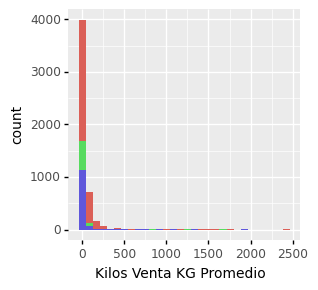

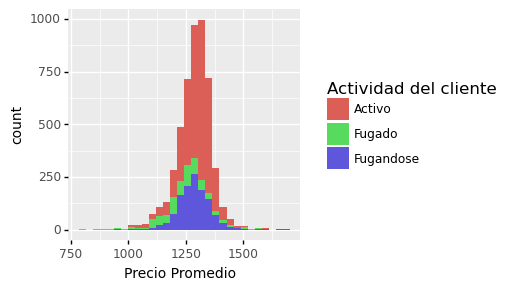

[<ggplot: (108838838007)>, <ggplot: (108838836718)>]

In [25]:
Y_G='Precio Promedio'
X_G='Kilos Venta KG Promedio'
Hist_Estado_R=[(
    ggplot(
     R_FM_Func.DF_Estado_R(Data_Customers_Full)
    ,aes(x= X_G
        # ,y=after_stat('width*density')
        # ,fill='Segmento'
        ,fill='Actividad del cliente'
         ))
    
    + geom_histogram(bins=30,alpha=1)
#      +scale_x_discrete(breaks= range(0,1100))
    # + scale_y_continuous(labels=percent_format()) # display labels as a percentage
       
    # +xlab('Ingresos en Miles de CLP')
    # +ylab('Porcentaje  de '+['Clientes','Facturaciones','Clientes'][i])
    # +ggtitle(List_Title[i])
    
    +theme(#axis_text_x = element_text(angle=90, hjust=1),
            legend_position='none',
            figure_size=(3,3),
            axis_title_x=element_text(size = 10),
            axis_title_y=element_text(size = 10),
            title=element_text(size = 12)
    
    )#theme
    
    
#         +scale_x_continuous(labels =  "{:,.1f}".format
#                         breaks =range(0,1750,250)                            )

),
(
    ggplot(
     R_FM_Func.DF_Estado_R(Data_Customers_Full)
    ,aes(x= Y_G
        # ,y=after_stat('width*density')
        # ,fill='Segmento'
        ,fill='Actividad del cliente'
         ))
    
    + geom_histogram(bins=30,alpha=1)
#      +scale_x_discrete(breaks= range(0,1100))
    # + scale_y_continuous(labels=percent_format()) # display labels as a percentage
       
    # +xlab('Ingresos en Miles de CLP')
    # +ylab('Porcentaje  de '+['Clientes','Facturaciones','Clientes'][i])
    # +ggtitle(List_Title[i])
    
    +theme(#axis_text_x = element_text(angle=90, hjust=1),
            # legend_position='none',
            figure_size=(3,3),
            axis_title_x=element_text(size = 10),
            axis_title_y=element_text(size = 10),
            title=element_text(size = 12)
    
    )#theme
    
    
#         +scale_x_continuous(labels =  "{:,.1f}".format
#                         breaks =range(0,1750,250)                            )

)
]
Hist_Estado_R

#### PDF

In [26]:
# Sabe pdf
# ```python
#============================
# Histograma Precio
#============================
file_name=('Histo r+ Precio y KG mean Cliente')
    
pngfill= Png_file_direct_Graphic_Canal_Material+"\\Cluster\\"

start_time = time.time()
save_as_pdf_pages(
                  
                  Hist_Estado_R
                    ,pngfill 
            +"\\"+ file_name + ".pdf")
time_convert(time.time()-start_time)
# ```

c:\Users\user\anaconda3\lib\site-packages\plotnine\ggplot.py:820: PlotnineWarning: Filename: C:\Users\user\Documents\Graficos\Canal Tradicional\1010078\Cluster\\Histo r+ Precio y KG mean Cliente.pdf


Time Lapsed = 0:0:0.6055712699890137 
 H:m:s


# K-means
Se realiza el clustering con los atributos de R+FM  (3 atributos, $F$ $M$ y $FxM$)

El sresultadod el clustering para cada actividad de los clientes se guardó en 
`R_FM_Customers[Actividad]`

Este solo posee los atributos de RFM posteriori, en descripción se incorporan más atributos y se contruye el df de facturaciones

## Clustering

#### R_FM como dicionario para rediriguir según la actividad
`R_FM_Customers`


In [27]:
R_FM_Customers={
    'Activo':RFM_Customers[RFM_Customers['Actividad del cliente']=='Activo']
    ,'Fugandose':RFM_Customers[RFM_Customers['Actividad del cliente']=='Fugandose']
    ,'Fugando':RFM_Customers[RFM_Customers['Actividad del cliente']=='Fugado']
}
for a in R_FM_Customers.keys(): print(a ,R_FM_Customers[a].shape)

Activo (3222, 8)
Fugandose (1232, 8)
Fugando (619, 8)


#### Curva K-means
`R_FM_Func.Curva_kmeans`


 Activo


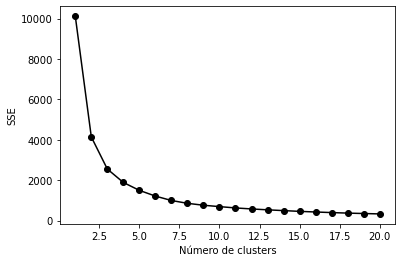


 Fugandose


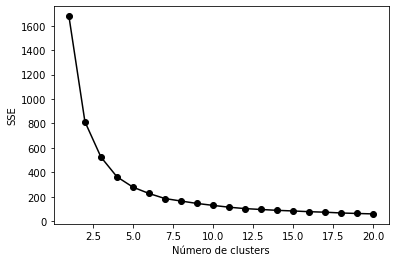


 Fugando


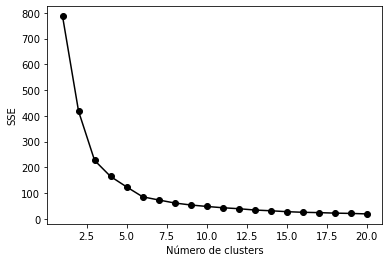

In [28]:
Col_FM=['Frecuency Actual del Cliente', 'Monetary Actual']
for a in R_FM_Customers.keys(): 
    print('\n',a)
    R_FM_Func.Curva_kmeans(
    R_FM_Customers[a],
    [c + ' (Escala ln)'+' (Normalizado)' for c in Col_FM]
     +['$(F \times W_F + M \times W_M)$']
    )[0]

### Clustering 
`R_FM_Func.def_Col_cluster`

In [29]:
Col_FM=['Frecuency Actual del Cliente', 'Monetary Actual']
A_Clust=[]
for i in R_FM_Customers.keys():
    R_FM_Customers[i]=\
      R_FM_Func.def_Col_cluster(
       R_FM_Customers[i] 
            ,[c + ' (Escala ln)'+' (Normalizado)' for c in Col_FM]
            +['$(F \times W_F + M \times W_M)$']
        ,5)
R_FM_Customers['Activo'].head()

,Cliente,Recency Actual,Frecuency Actual del Cliente,Monetary Actual,Actividad del cliente,Frecuency Actual del Cliente (Escala ln) (Normalizado),Monetary Actual (Escala ln) (Normalizado),$(F \times W_F + M \times W_M)$,identified_clusters,F-1
1,10007508,0,0.201752,117683.471154,Activo,1.839562,1.409578,2.262435,3,4.956570
2,10017269,3,0.059365,29699.448718,Activo,0.832022,-0.475164,0.689473,2,16.845022
3,10023880,47,0.039591,38390.000000,Activo,0.498378,-0.123821,0.461232,2,25.258465
4,10028999,32,0.017541,29060.307692,Activo,-0.172059,-0.504944,-0.323542,4,57.008334
6,10032204,5,0.007030,30206.000000,Activo,-0.925133,-0.452014,-1.060737,4,142.247750


# Descripción

### Data a usar
>A_rfm='Activo'
- `df_C_fact`

- `df_C_Customers`

#### Data Actividad
Se crean los Dataframe con más atributos
- `df_C_fact`
- `df_C_Customers`

In [30]:
A_rfm='Activo'
print(R_FM_Customers.keys())
R_FM_Customers[A_rfm].head(2)

dict_keys(['Activo', 'Fugandose', 'Fugando'])


,Cliente,Recency Actual,Frecuency Actual del Cliente,Monetary Actual,Actividad del cliente,Frecuency Actual del Cliente (Escala ln) (Normalizado),Monetary Actual (Escala ln) (Normalizado),$(F \times W_F + M \times W_M)$,identified_clusters,F-1
1,10007508,0,0.201752,117683.471154,Activo,1.839562,1.409578,2.262435,3,4.956570
2,10017269,3,0.059365,29699.448718,Activo,0.832022,-0.475164,0.689473,2,16.845022


In [31]:
#=================================
# Creo Dataframe con más valores
#=================================
print(A_rfm)
#----------------------------------------------------
# Dataframe de Facturaciones
df_C_fact=pd.merge(
    R_FM_Customers[A_rfm]
,data_rfm,how='left')
print('Facturas \n',df_C_fact.shape)
# print('Facturas \n', '; '.join( df_C_fact.columns.to_list()))
# ,df_C_fact.columns)

#----------------------------------------------------
# Dataframe de Cientes
print('-------------------------------' )
df_C_Customers=pd.merge(
    R_FM_Customers[A_rfm]
,Data_Customers_Full,how='left')
print('Atributos \n',df_C_Customers.shape)
# print('Atributos \n', '; '.join( df_C_Customers.columns.to_list()))


Activo
Facturas 
 (180375, 33)
-------------------------------
Atributos 
 (3222, 30)


In [32]:
df_C_Customers.describe()

,Recency Actual,Frecuency Actual del Cliente,Monetary Actual,Frecuency Actual del Cliente (Escala ln) (Normalizado),Monetary Actual (Escala ln) (Normalizado),$(F \times W_F + M \times W_M)$,F-1,%△Valoración Promedio \n Tipo de Semana 0,%△Valoración Promedio \n Tipo de Semana 1,%△Valoración Promedio \n Tipo de Semana 2,...,Kilos Venta KG Promedio \n Tipo de Semana 3,Kilos Venta KG Promedio \n Tipo de Semana 4,Kilos Venta KG Promedio,Precio Promedio,Año Creación Promedio,Frecuencia Historica Promedio,Ticket Promedio Actual,Ticket std Actual,Ticket CV Actual,$F^{-1}$ Actual
count,3222.000000,3222.000000,3.222000e+03,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,...,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000
mean,25.846369,0.064938,8.398265e+04,0.448868,0.191445,0.506302,44.703850,-0.016593,-0.021282,-0.018312,...,75.398726,76.565454,70.102741,1296.676481,2013.738361,109.569212,70.102741,32.095678,0.264503,44.703850
std,25.994297,0.071229,1.751840e+05,0.885554,1.100515,1.070687,45.089780,0.042393,0.052267,0.048756,...,181.984804,173.538614,161.903278,67.724598,5.256372,135.621220,161.903278,95.273881,0.270764,45.089780
min,0.000000,0.003137,2.420000e+04,-1.589588,-0.755473,-1.731458,2.166226,-0.209951,-0.248597,-0.214158,...,18.000000,18.000000,18.000000,893.484848,2007.000000,6.000000,18.000000,0.000000,0.000000,2.166226
25%,4.000000,0.015625,2.913429e+04,-0.267337,-0.501464,-0.389493,10.979255,-0.040365,-0.050580,-0.037369,...,22.000000,22.000000,22.000000,1262.129568,2007.000000,20.000000,22.000000,0.000000,0.000000,10.979255
50%,14.000000,0.033469,3.211001e+04,0.360041,-0.368339,0.361138,29.878182,-0.010162,-0.012585,-0.007353,...,22.833333,23.411224,24.262533,1305.000000,2014.000000,47.000000,24.262533,6.957011,0.269434,29.878182
75%,46.000000,0.091081,6.250627e+04,1.184561,0.543457,1.392497,64.000000,0.012226,0.014395,0.011552,...,52.199123,55.000000,47.936873,1338.160173,2019.000000,155.000000,47.936873,21.118058,0.428795,64.000000
max,90.000000,0.461632,2.754333e+06,2.521275,5.725500,3.472428,318.729413,0.241900,0.317085,0.149134,...,2481.500000,2221.000000,2443.104839,1690.000000,2021.000000,1088.000000,2443.104839,2006.682865,2.750346,318.729413


In [33]:
df_C_Customers.head()

,Cliente,Recency Actual,Frecuency Actual del Cliente,Monetary Actual,Actividad del cliente,Frecuency Actual del Cliente (Escala ln) (Normalizado),Monetary Actual (Escala ln) (Normalizado),$(F \times W_F + M \times W_M)$,identified_clusters,F-1,...,Fecha ultima Compra,Fecha Creacion,Kilos Venta KG Promedio,Precio Promedio,Año Creación Promedio,Frecuencia Historica Promedio,Ticket Promedio Actual,Ticket std Actual,Ticket CV Actual,$F^{-1}$ Actual
0,10007508,0,0.201752,117683.471154,Activo,1.839562,1.409578,2.262435,3,4.956570,...,2021-10-26,2018-03-01,93.158654,1266.894231,2007,464,93.158654,36.215256,0.388748,4.956570
1,10017269,3,0.059365,29699.448718,Activo,0.832022,-0.475164,0.689473,2,16.845022,...,2021-10-23,2018-01-27,22.038462,1347.782051,2007,101,22.038462,0.612474,0.027791,16.845022
2,10023880,47,0.039591,38390.000000,Activo,0.498378,-0.123821,0.461232,2,25.258465,...,2021-09-09,2018-12-28,27.500000,1400.000000,2007,383,27.500000,12.102631,0.440096,25.258465
3,10028999,32,0.017541,29060.307692,Activo,-0.172059,-0.504944,-0.323542,4,57.008334,...,2021-09-24,2019-11-05,22.000000,1320.923077,2007,62,22.000000,0.000000,0.000000,57.008334
4,10032204,5,0.007030,30206.000000,Activo,-0.925133,-0.452014,-1.060737,4,142.247750,...,2021-10-21,2020-08-24,22.000000,1373.000000,2020,12,22.000000,0.000000,0.000000,142.247750


#### Definición Semgento

Diccionario `RFM_Dic_Cluster`

1. Activo
    >0. segmento de alta frecuencia, Monetary Promedio
    >1. Semengo de alto poder adquisitivo
    >2. semegneot de frecuencia promedio, Monetary promedio 
    >3. segmento de alta frecuencua y Medio alto poder adquisitivo
    >4. semgento de baja frecuencia, poder adquisitvo promedio(Cliente oportunista)

In [34]:
RFM_Dic_Cluster={
    'Activo':[
        '$F$ Alto, ' +'$M$ Promedio'
        ,'$F$ Media Alto, ' +'$M$ Alto'
        ,'$F$ Promedio, ' +'$M$ Media Bajo'
        ,'$F$ Alto, ' +'$M$ Media Alto'
        ,'$F$ Bajo, ' +'$M$ Bajo'
    ]

}

Se incorpora columna Segmento a los DF

In [35]:
print(A_rfm)
df_C_Customers['Segmento']=\
    df_C_Customers.identified_clusters.apply(lambda x: RFM_Dic_Cluster[A_rfm][int(x)]
                            )

df_C_fact['Segmento']=\
    df_C_fact.identified_clusters.apply(lambda x: RFM_Dic_Cluster[A_rfm][int(x)]
                            )
print(df_C_fact.columns)

df_C_Customers.head(1)


Activo
Index(['Cliente', 'Recency Actual', 'Frecuency Actual del Cliente',
       'Monetary Actual', 'Actividad del cliente',
       'Frecuency Actual del Cliente (Escala ln) (Normalizado)',
       'Monetary Actual (Escala ln) (Normalizado)',
       '$(F \times W_F + M \times W_M)$', 'identified_clusters', 'F-1',
       'Semana', 'Tipo de Semana', 'Material (Nombre)', 'Kilos Venta KG',
       'Precio', 'Día natural', 'Día Semana', 'Mes', 'Año', 'Población',
       'Centro', 'Cluster', 'Segmento.1', 'Categoría Cliente', 'Año Creación',
       'Material Favorito', 'Frecuencia Historica', 'Mes_num', 'Recency',
       'Frecuency_Row', 'Ingreso de Venta CLP', 'Monetary', 'Recency días',
       'Segmento'],
      dtype='object')


,Cliente,Recency Actual,Frecuency Actual del Cliente,Monetary Actual,Actividad del cliente,Frecuency Actual del Cliente (Escala ln) (Normalizado),Monetary Actual (Escala ln) (Normalizado),$(F \times W_F + M \times W_M)$,identified_clusters,F-1,...,Fecha Creacion,Kilos Venta KG Promedio,Precio Promedio,Año Creación Promedio,Frecuencia Historica Promedio,Ticket Promedio Actual,Ticket std Actual,Ticket CV Actual,$F^{-1}$ Actual,Segmento
0,10007508,0,0.201752,117683.471154,Activo,1.839562,1.409578,2.262435,3,4.95657,...,2018-03-01,93.158654,1266.894231,2007,464,93.158654,36.215256,0.388748,4.95657,"$F$ Alto, $M$ Media Alto"


#### Data de para tabla o Grafico

In [36]:
#========================================================
# Data Frame con los atributos numericos de cada semgneto

#Data Frame copia de los cleintes
rfm_df=df_C_Customers.copy()

#=================================================
# Columna de Atributos que son numericos
df_colums=pd.DataFrame(rfm_df.dtypes).reset_index()
num_Col=df_colums[(df_colums[0]=='int64')
|(df_colums[0]=='float64')]['index'].to_list()
# num_Col
del df_colums


L_df_Col=list()
for c in num_Col: # Dic_col['RFM Customers']:
    L_df_Col.append(
    pd.DataFrame( 
        {'Valor': rfm_df[c].to_list()
        ,'Atributo':[c for i in range(rfm_df.shape[0])]
        ,'Segmento':rfm_df['Segmento']
        }
                )
    )
df_col=pd.concat(L_df_Col)
df_col.Valor=df_col.Valor.astype('float64')
df_col.head(2)

,Valor,Atributo,Segmento
0,0.0,Recency Actual,"$F$ Alto, $M$ Media Alto"
1,3.0,Recency Actual,"$F$ Promedio, $M$ Media Bajo"


## Tablas Descriptivas
>`df_C_fact`

>`df_C_Customers`

### Atributo segmetno

### Atributos RFM
pegar en latex post grafico des dispersion

In [37]:
rfm_df.columns

Index(['Cliente', 'Recency Actual', 'Frecuency Actual del Cliente',
       'Monetary Actual', 'Actividad del cliente',
       'Frecuency Actual del Cliente (Escala ln) (Normalizado)',
       'Monetary Actual (Escala ln) (Normalizado)',
       '$(F \times W_F + M \times W_M)$', 'identified_clusters', 'F-1',
       '%△Valoración Promedio \n Tipo de Semana 0',
       '%△Valoración Promedio \n Tipo de Semana 1',
       '%△Valoración Promedio \n Tipo de Semana 2',
       '%△Valoración Promedio \n Tipo de Semana 3',
       '%△Valoración Promedio \n Tipo de Semana 4',
       'Kilos Venta KG Promedio \n Tipo de Semana 0',
       'Kilos Venta KG Promedio \n Tipo de Semana 1',
       'Kilos Venta KG Promedio \n Tipo de Semana 2',
       'Kilos Venta KG Promedio \n Tipo de Semana 3',
       'Kilos Venta KG Promedio \n Tipo de Semana 4', 'Fecha ultima Compra',
       'Fecha Creacion', 'Kilos Venta KG Promedio', 'Precio Promedio',
       'Año Creación Promedio', 'Frecuencia Historica Promedio',
   

In [38]:
rfm_df['Frecuency-1']=rfm_df[ Dic_col['RFM Customers'][1] ].apply(lambda x: x**(-1))

print\
(rfm_df[['Segmento', Dic_col['RFM Customers'][0] , 'Frecuency-1',Dic_col['RFM Customers'][2] 
        ,'$(F \times W_F + M \times W_M)$'  ] ]\
        .groupby('Segmento').mean().round(0).to_latex\
                (float_format="{:,.0f}".format))

# rfm_df['Frecuency-1']=rfm_df[ Dic_col['RFM Customers'][1] ].apply(lambda x: x**(-1))
rfm_df[['Segmento', Dic_col['RFM Customers'][0] , 'Frecuency-1',Dic_col['RFM Customers'][2] 
        ,'$(F \times W_F + M \times W_M)$'  ] ]\
        .groupby('Segmento').mean().round(0)

\begin{tabular}{lrrrr}
\toprule
{} &  Recency Actual &  Frecuency-1 &  Monetary Actual &  \$(F \textbackslash times W\_F + M \textbackslash times W\_M)\$ \\
Segmento                     &                 &              &                  &                                  \\
\midrule
\$F\$ Alto, \$M\$ Promedio       &              10 &           11 &           45,099 &                                1 \\
\$F\$ Media Alto, \$M\$ Alto     &              22 &           28 &          596,998 &                                2 \\
\$F\$ Promedio, \$M\$ Media Bajo &              27 &           36 &           35,750 &                                0 \\
\$F\$ Alto, \$M\$ Media Alto     &               7 &            8 &          127,444 &                                2 \\
\$F\$ Bajo, \$M\$ Bajo           &              46 &          100 &           29,885 &                               -1 \\
\bottomrule
\end{tabular}



,Recency Actual,Frecuency-1,Monetary Actual,$(F \times W_F + M \times W_M)$
Segmento,,,,
"$F$ Alto, $M$ Promedio",10.0,11.0,45099.0,1.0
"$F$ Media Alto, $M$ Alto",22.0,28.0,596998.0,2.0
"$F$ Promedio, $M$ Media Bajo",27.0,36.0,35750.0,0.0
"$F$ Alto, $M$ Media Alto",7.0,8.0,127444.0,2.0
"$F$ Bajo, $M$ Bajo",46.0,100.0,29885.0,-1.0


#### Descriptivo

In [39]:
# rfm_df=RFM_Customers.copy()
# Ac_T=pd.CategoricalDtype(categories=['Activo', 'Fugandose','Fugado'], ordered=True)
# rfm_df['Actividad del cliente']=pd.Series(rfm_df['Actividad del cliente'], dtype=Ac_T)

rfm_df['Frecuency-1']=rfm_df[ Dic_col['RFM Customers'][1] ].apply(lambda x: x**(-1))

#Listas
L_round=[0,0,0]
List_Tab=list()

for i in range(3):
#     i=1
    if(i==1):
        
        List_Tab.append(
        rfm_df[['Segmento', 'Frecuency-1' ]]\
        .groupby('Segmento').describe()\
        ['Frecuency-1'].reset_index()\
        .round(L_round[i]))

        List_Tab[i]['Atributo']=['Frecuency-1' for j in range(5)]
    else:    
        List_Tab.append(
        rfm_df[['Segmento', Dic_col['RFM Customers'][i] ]]\
        .groupby('Segmento').describe()\
        [Dic_col['RFM Customers'][i]].reset_index()\
        .round(L_round[i]))
        List_Tab[i]['Atributo']=[Dic_col['RFM Customers'][i] for j in range(5)]
        
#     List_Tab[i]=List_Tab[i].drop(columns=['count'])
    List_Tab[i].set_index('Atributo')
# pd.concat(List_Tab  )
# List_Tab[0].set_index('Atributo')
print(pd.concat(List_Tab).set_index(['Atributo','Segmento']).to_latex\
          (float_format="{:,.0f}".format)
     
     )
pd.concat(List_Tab  ).set_index(['Atributo','Segmento'])

\begin{tabular}{llrrrrrrrr}
\toprule
                &                    &  count &    mean &     std &     min &     25\% &     50\% &     75\% &       max \\
Atributo & Segmento &        &         &         &         &         &         &         &           \\
\midrule
Recency Actual & \$F\$ Alto, \$M\$ Promedio &    680 &      10 &      16 &       0 &       3 &       4 &      11 &        89 \\
                & \$F\$ Media Alto, \$M\$ Alto &    197 &      22 &      23 &       0 &       5 &      11 &      35 &        88 \\
                & \$F\$ Promedio, \$M\$ Media Bajo &    922 &      27 &      23 &       0 &       7 &      21 &      43 &        90 \\
                & \$F\$ Alto, \$M\$ Media Alto &    480 &       7 &      11 &       0 &       1 &       4 &       6 &        74 \\
                & \$F\$ Bajo, \$M\$ Bajo &    943 &      46 &      26 &       0 &      26 &      47 &      68 &        90 \\
Frecuency-1 & \$F\$ Alto, \$M\$ Promedio &    680 &      11 &       5 &     

count      mean       std  \
Atributo        Segmento                                                  
Recency Actual  $F$ Alto, $M$ Promedio        680.0      10.0      16.0   
                $F$ Media Alto, $M$ Alto      197.0      22.0      23.0   
                $F$ Promedio, $M$ Media Bajo  922.0      27.0      23.0   
                $F$ Alto, $M$ Media Alto      480.0       7.0      11.0   
                $F$ Bajo, $M$ Bajo            943.0      46.0      26.0   
Frecuency-1     $F$ Alto, $M$ Promedio        680.0      11.0       5.0   
                $F$ Media Alto, $M$ Alto      197.0      28.0      23.0   
                $F$ Promedio, $M$ Media Bajo  922.0      36.0      12.0   
                $F$ Alto, $M$ Media Alto      480.0       8.0       5.0   
                $F$ Bajo, $M$ Bajo            943.0     100.0      45.0   
Monetary Actual $F$ Alto, $M$ Promedio        680.0   45099.0   14733.0   
                $F$ Media Alto, $M$ Alto      197.0  596998.0  441966.0   
                $F$ Promedio, $M$ Media Bajo  922.0   35750.0   16287.0   
                $F$ Alto, $M$ Media Alto      480.0  127444.0   54988.0   
                $F$ Bajo, $M$ Bajo            943.0   29885.0    6383.0   

                                                   min       25%       50%  \
Atributo        Segmento                                                     
Recency Actual  $F$ Alto, $M$ Promedio             0.0       3.0       4.0   
                $F$ Media Alto, $M$ Alto           0.0       5.0      11.0   
                $F$ Promedio, $M$ Media Bajo       0.0       7.0      21.0   
                $F$ Alto, $M$ Media Alto           0.0       1.0       4.0   
                $F$ Bajo, $M$ Bajo                 0.0      26.0      47.0   
Frecuency-1     $F$ Alto, $M$ Promedio             3.0       7.0      10.0   
                $F$ Media Alto, $M$ Alto           4.0      13.0      22.0   
                $F$ Promedio, $M$ Media Bajo      16.0      27.0      35.0   
                $F$ Alto, $M$ Media Alto           2.0       5.0       7.0   
                $F$ Bajo, $M$ Bajo                52.0      68.0      86.0   
Monetary Actual $F$ Alto, $M$ Promedio         27940.0   32833.0   41486.0   
                $F$ Media Alto, $M$ Alto      158212.0  268488.0  433333.0   
                $F$ Promedio, $M$ Media Bajo   25300.0   29178.0   30349.0   
                $F$ Alto, $M$ Media Alto       49157.0   84227.0  115467.0   
                $F$ Bajo, $M$ Bajo             24200.0   27563.0   28556.0   

                                                   75%        max  
Atributo        Segmento                                           
Recency Actual  $F$ Alto, $M$ Promedio            11.0       89.0  
                $F$ Media Alto, $M$ Alto          35.0       88.0  
                $F$ Promedio, $M$ Media Bajo      43.0       90.0  
                $F$ Alto, $M$ Media Alto           6.0       74.0  
                $F$ Bajo, $M$ Bajo                68.0       90.0  
Frecuency-1     $F$ Alto, $M$ Promedio            13.0       30.0  
                $F$ Media Alto, $M$ Alto          39.0      161.0  
                $F$ Promedio, $M$ Media Bajo      45.0       96.0  
                $F$ Alto, $M$ Media Alto          10.0       33.0  
                $F$ Bajo, $M$ Bajo               116.0      319.0  
Monetary Actual $F$ Alto, $M$ Promedio         53616.0   112013.0  
                $F$ Media Alto, $M$ Alto      846161.0  2754333.0  
                $F$ Promedio, $M$ Media Bajo   33712.0   164363.0  
                $F$ Alto, $M$ Media Alto      158100.0   356776.0  
                $F$ Bajo, $M$ Bajo             29985.0   128182.0

In [40]:
# rfm_df=RFM_Customers.copy()
# Ac_T=pd.CategoricalDtype(categories=['Activo', 'Fugandose','Fugado'], ordered=True)
# rfm_df['Actividad del cliente']=pd.Series(rfm_df['Actividad del cliente'], dtype=Ac_T)

rfm_df['Frecuency-1']=rfm_df[ Dic_col['RFM Customers'][1] ].apply(lambda x: x**(-1))

#Listas
L_round=[0,0,0]
List_Tab=list()

for i in range(3):
#     i=1
    if(i==1):
        
        List_Tab.append(
        rfm_df[['Segmento', 'Frecuency-1' ]]\
        .groupby('Segmento').mean()\
        ['Frecuency-1'].reset_index()\
        .round(L_round[i]))
        List_Tab[i]['Atributo']=['Frecuency-1' for j in range(5)]
        List_Tab[i]=List_Tab[i].rename(columns={
                        'Frecuency-1':'Valor promedio'
                        })
    else:    
        List_Tab.append(
        rfm_df[['Segmento', Dic_col['RFM Customers'][i] ]]\
        .groupby('Segmento').mean()\
        [Dic_col['RFM Customers'][i]].reset_index()\
        .round(L_round[i]))
        List_Tab[i]['Atributo']=[Dic_col['RFM Customers'][i] for j in range(5)]
        
#     List_Tab[i]=List_Tab[i].drop(columns=['count'])
    List_Tab[i].set_index('Atributo')
    List_Tab[i]=List_Tab[i].rename(columns={
                        Dic_col['RFM Customers'][i]:'Valor promedio'
                        })
# pd.concat(List_Tab  )
# List_Tab[0].set_index('Atributo')
print(pd.concat(List_Tab  ).set_index(['Atributo','Segmento']).T.to_latex\
          (float_format="{:,.0f}".format)
     
     )
pd.concat(List_Tab  ).set_index(['Atributo','Segmento'])

\begin{tabular}{lrrrrrrrrrrrrrrr}
\toprule
Atributo & \multicolumn{5}{l}{Recency Actual} & \multicolumn{5}{l}{Frecuency-1} & \multicolumn{5}{l}{Monetary Actual} \\
Segmento & \$F\$ Alto, \$M\$ Promedio & \$F\$ Media Alto, \$M\$ Alto & \$F\$ Promedio, \$M\$ Media Bajo & \$F\$ Alto, \$M\$ Media Alto & \$F\$ Bajo, \$M\$ Bajo & \$F\$ Alto, \$M\$ Promedio & \$F\$ Media Alto, \$M\$ Alto & \$F\$ Promedio, \$M\$ Media Bajo & \$F\$ Alto, \$M\$ Media Alto & \$F\$ Bajo, \$M\$ Bajo & \$F\$ Alto, \$M\$ Promedio & \$F\$ Media Alto, \$M\$ Alto & \$F\$ Promedio, \$M\$ Media Bajo & \$F\$ Alto, \$M\$ Media Alto & \$F\$ Bajo, \$M\$ Bajo \\
\midrule
Valor promedio &                     10 &                       22 &                           27 &                        7 &                 46 &                     11 &                       28 &                           36 &                        8 &                100 &                 45,099 &                  596,998 &                       35,750 & 

Valor promedio
Atributo        Segmento                                    
Recency Actual  $F$ Alto, $M$ Promedio                  10.0
                $F$ Media Alto, $M$ Alto                22.0
                $F$ Promedio, $M$ Media Bajo            27.0
                $F$ Alto, $M$ Media Alto                 7.0
                $F$ Bajo, $M$ Bajo                      46.0
Frecuency-1     $F$ Alto, $M$ Promedio                  11.0
                $F$ Media Alto, $M$ Alto                28.0
                $F$ Promedio, $M$ Media Bajo            36.0
                $F$ Alto, $M$ Media Alto                 8.0
                $F$ Bajo, $M$ Bajo                     100.0
Monetary Actual $F$ Alto, $M$ Promedio               45099.0
                $F$ Media Alto, $M$ Alto            596998.0
                $F$ Promedio, $M$ Media Bajo         35750.0
                $F$ Alto, $M$ Media Alto            127444.0
                $F$ Bajo, $M$ Bajo                   29885.0

### General

In [41]:
df_C_Customers.groupby('Segmento').mean().T

Segmento,"$F$ Alto, $M$ Promedio","$F$ Media Alto, $M$ Alto","$F$ Promedio, $M$ Media Bajo","$F$ Alto, $M$ Media Alto","$F$ Bajo, $M$ Bajo"
Recency Actual,10.377941,21.964467,27.415401,6.608333,46.069989
Frecuency Actual del Cliente,0.115756,0.060402,0.030986,0.164870,0.011571
Monetary Actual,45098.851895,596997.511585,35750.447022,127444.089997,29884.729700
Frecuency Actual del Cliente (Escala ln) (Normalizado),1.294043,0.625515,0.247430,1.561513,-0.566892
Monetary Actual (Escala ln) (Normalizado),0.032287,3.313593,-0.297509,1.401948,-0.484124
$(F \times W_F + M \times W_M)$,1.303729,1.619593,0.158178,1.982098,-0.712130
F-1,10.614532,28.406389,36.284178,8.134845,99.536720
%△Valoración Promedio \n Tipo de Semana 0,0.004518,-0.018422,-0.019789,0.012126,-0.042929
%△Valoración Promedio \n Tipo de Semana 1,0.002296,-0.021247,-0.027350,0.015319,-0.050989
%△Valoración Promedio \n Tipo de Semana 2,-0.000065,-0.022778,-0.020922,0.012308,-0.043571


## Grafica de dispersion
`rfm_clust_x=df_C_Customers.copy()`

### Grafica M F


In [42]:
# a=list(R_FM_Customers.keys())[0]
# rfm_clust_x=R_FM_Customers[A_rfm].copy()
rfm_clust_x=df_C_Customers.copy()
print(rfm_clust_x['Actividad del cliente'].unique()[0])

Activo


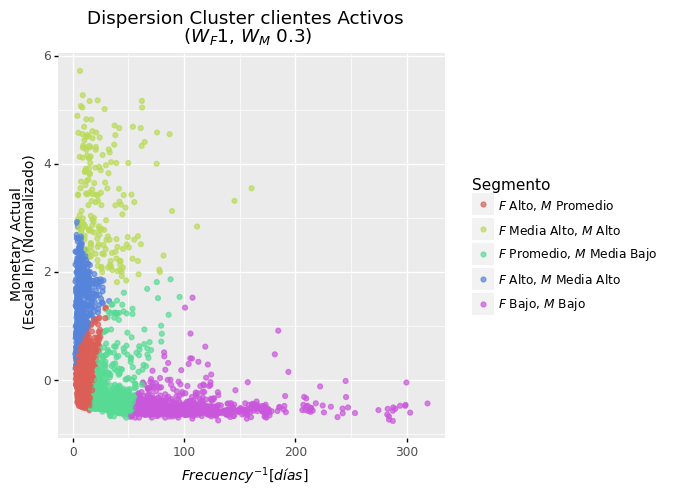

<ggplot: (108838058213)>

In [43]:
rfm_clust_x['Monetary Actual \n en Millones de CLP']=\
rfm_clust_x['Monetary Actual'].apply(lambda x: x/10**6)
rfm_clust_x['Cluster']=rfm_clust_x.identified_clusters.apply(lambda x:   'Segmento '+str(x) )
GGplot_rfm_x=\
(
    ggplot(
        #             rfm_clust
        rfm_clust_x
        , aes(y='Monetary Actual'+' (Escala ln) (Normalizado)'
        #                  'Monetary Actual \n en Millones de CLP',
            ,x='F-1'
            #'Frecuency Actual del Cliente'
            #'F-1'
             ,fill='Segmento'
            ,color='Segmento'
                     ))\
        #                 + labs(y='Disposición a pagar')\
            + geom_point(
        #         aes(color='Cluster de Clientes'),
                alpha=0.7)\
        #                 +geom_smooth()\
        #                 +ggtitle(('Dispersión Clusters Clientes'+
        #                           ' \n Disposición a pagar v/s '+
        #                          'Cluster de Semana'))\
        +ylab('Monetary Actual'+'\n'+' (Escala ln) (Normalizado)')
        +xlab('$Frecuency^{-1} [días]$')
        +ggtitle('Dispersion Cluster clientes '+
                rfm_clust_x['Actividad del cliente'].unique()[0]+'s'+
                 '\n ($W_F $'+str(w_f)+', $W_M$ '+str(w_m) +')'
                 )
        +theme(
            # axis_text_x = element_text(angle=90, hjust=1)
            figure_size=(5,5),
            axis_title_x=element_text(size = 10),
            axis_title_y=element_text(size = 10),
            )\


    )
GGplot_rfm_x

Frecuency Actual del Cliente
Monetary Actual


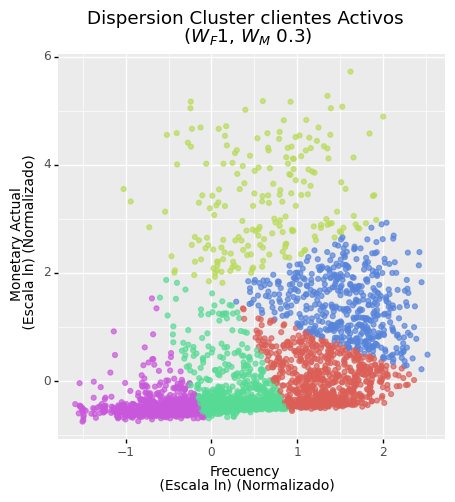

<ggplot: (108716860793)>

In [44]:
GGplot_rfm_FM=\
(
    ggplot(
        #             rfm_clust
        data_ln(rfm_clust_x, ['Frecuency Actual del Cliente',
                             'Monetary Actual'],False)
        , aes(y='Monetary Actual'+' (Escala ln) (Normalizado)'
        #                  'Monetary Actual \n en Millones de CLP',
            ,x='Frecuency Actual del Cliente'+' (Escala ln) (Normalizado)'
            #'F-1'
             ,fill='Segmento'
            ,color='Segmento'
                     ))\
        #                 + labs(y='Disposición a pagar')\
            + geom_point(
        #         aes(color='Cluster de Clientes'),
                alpha=0.7)\
        #                 +geom_smooth()\
        #                 +ggtitle(('Dispersión Clusters Clientes'+
        #                           ' \n Disposición a pagar v/s '+
        #                          'Cluster de Semana'))\
        +ylab('Monetary Actual'+'\n'+' (Escala ln) (Normalizado)')
        +xlab('Frecuency'+'\n'+' (Escala ln) (Normalizado)')
        +ggtitle('Dispersion Cluster clientes '+
                rfm_clust_x['Actividad del cliente'].unique()[0]+'s'+
                 '\n ($W_F $'+str(w_f)+', $W_M$ '+str(w_m) +')'
                 )
        +theme(
            # axis_text_x = element_text(angle=90, hjust=1)
            legend_position='none'
            ,figure_size=(5,5),
            axis_title_x=element_text(size = 10),
            axis_title_y=element_text(size = 10),
            )\


    )
GGplot_rfm_FM

#### Save

In [45]:
Png_file_direct_Graphic_Canal_Material+"\\Cluster\\RFM"

'C:\\Users\\user\\Documents\\Graficos\\Canal Tradicional\\1010078\\Cluster\\RFM'

In [46]:
# ```python
#============================
# W_F y W_F con la dispersion de los clusters generados
#============================
file_name=('Clusters r+fm Activo W Disp')
    
pngfill= Png_file_direct_Graphic_Canal_Material+"\\Cluster\\RFM"

start_time = time.time()
save_as_pdf_pages(
                  
                  [ GGplot_rfm_FM, GGplot_rfm_x  ]
                    ,pngfill 
            +"\\"+ file_name + ".pdf")
time_convert(time.time()-start_time)
# ```

c:\Users\user\anaconda3\lib\site-packages\plotnine\ggplot.py:820: PlotnineWarning: Filename: C:\Users\user\Documents\Graficos\Canal Tradicional\1010078\Cluster\RFM\Clusters r+fm Activo W Disp.pdf


Time Lapsed = 0:0:1.658508539199829 
 H:m:s


### Grafica P Q

In [47]:
# a=list(R_FM_Customers.keys())[0]
# rfm_clust_x=R_FM_Customers[A_rfm].copy()
rfm_clust_x=df_C_Customers.copy()
print(rfm_clust_x['Actividad del cliente'].unique()[0])

Activo


In [48]:
rfm_clust_x.columns

Index(['Cliente', 'Recency Actual', 'Frecuency Actual del Cliente',
       'Monetary Actual', 'Actividad del cliente',
       'Frecuency Actual del Cliente (Escala ln) (Normalizado)',
       'Monetary Actual (Escala ln) (Normalizado)',
       '$(F \times W_F + M \times W_M)$', 'identified_clusters', 'F-1',
       '%△Valoración Promedio \n Tipo de Semana 0',
       '%△Valoración Promedio \n Tipo de Semana 1',
       '%△Valoración Promedio \n Tipo de Semana 2',
       '%△Valoración Promedio \n Tipo de Semana 3',
       '%△Valoración Promedio \n Tipo de Semana 4',
       'Kilos Venta KG Promedio \n Tipo de Semana 0',
       'Kilos Venta KG Promedio \n Tipo de Semana 1',
       'Kilos Venta KG Promedio \n Tipo de Semana 2',
       'Kilos Venta KG Promedio \n Tipo de Semana 3',
       'Kilos Venta KG Promedio \n Tipo de Semana 4', 'Fecha ultima Compra',
       'Fecha Creacion', 'Kilos Venta KG Promedio', 'Precio Promedio',
       'Año Creación Promedio', 'Frecuencia Historica Promedio',
   

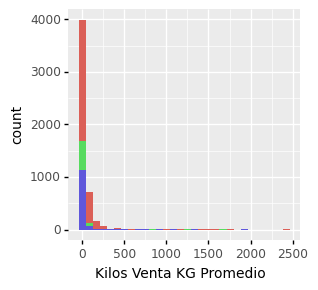

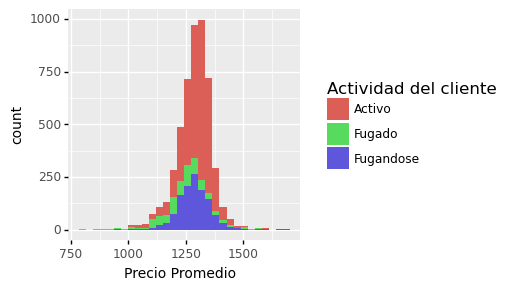

[<ggplot: (108718774074)>, <ggplot: (108718709239)>]

In [49]:
Y_G='Precio Promedio'
X_G='Kilos Venta KG Promedio'
Hist_Estado_R=[(
    ggplot(
     R_FM_Func.DF_Estado_R(Data_Customers_Full)
    ,aes(x= X_G
        # ,y=after_stat('width*density')
        # ,fill='Segmento'
        ,fill='Actividad del cliente'
         ))
    
    + geom_histogram(bins=30,alpha=1)
#      +scale_x_discrete(breaks= range(0,1100))
    # + scale_y_continuous(labels=percent_format()) # display labels as a percentage
       
    # +xlab('Ingresos en Miles de CLP')
    # +ylab('Porcentaje  de '+['Clientes','Facturaciones','Clientes'][i])
    # +ggtitle(List_Title[i])
    
    +theme(#axis_text_x = element_text(angle=90, hjust=1),
            legend_position='none',
            figure_size=(3,3),
            axis_title_x=element_text(size = 10),
            axis_title_y=element_text(size = 10),
            title=element_text(size = 12)
    
    )#theme
    
    
#         +scale_x_continuous(labels =  "{:,.1f}".format
#                         breaks =range(0,1750,250)                            )

),
(
    ggplot(
     R_FM_Func.DF_Estado_R(Data_Customers_Full)
    ,aes(x= Y_G
        # ,y=after_stat('width*density')
        # ,fill='Segmento'
        ,fill='Actividad del cliente'
         ))
    
    + geom_histogram(bins=30,alpha=1)
#      +scale_x_discrete(breaks= range(0,1100))
    # + scale_y_continuous(labels=percent_format()) # display labels as a percentage
       
    # +xlab('Ingresos en Miles de CLP')
    # +ylab('Porcentaje  de '+['Clientes','Facturaciones','Clientes'][i])
    # +ggtitle(List_Title[i])
    
    +theme(#axis_text_x = element_text(angle=90, hjust=1),
            # legend_position='none',
            figure_size=(3,3),
            axis_title_x=element_text(size = 10),
            axis_title_y=element_text(size = 10),
            title=element_text(size = 12)
    
    )#theme
    
    
#         +scale_x_continuous(labels =  "{:,.1f}".format
#                         breaks =range(0,1750,250)                            )

)
]
Hist_Estado_R

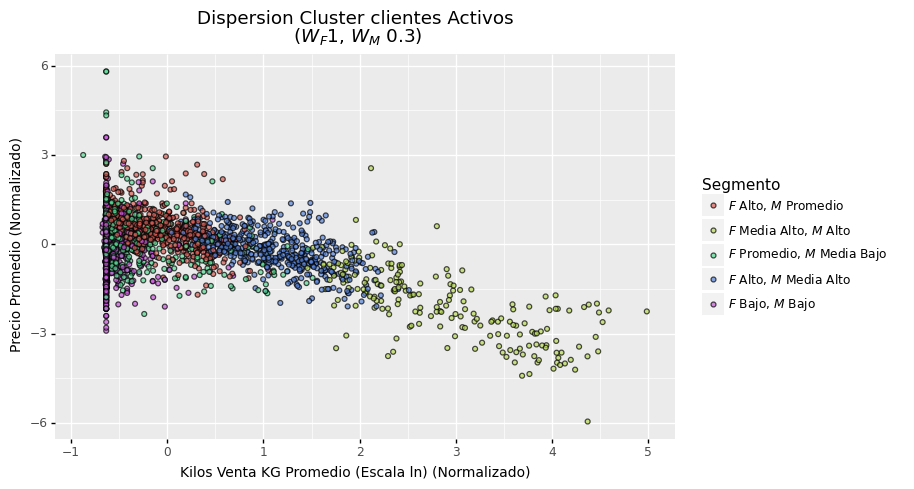

<ggplot: (108718741089)>

In [50]:
Y_G='Precio Promedio'
X_G='Kilos Venta KG Promedio'
(
    ggplot(
        R_FM_Func.data_Norm_satandar( R_FM_Func.data_ln(rfm_clust_x,[X_G],False)
                                    ,[c+' (Escala ln)' for c in [X_G]] + [Y_G] ,False)
        #+' (Escala ln)'
        , aes(y=Y_G+' (Normalizado)'
            ,x=X_G+' (Escala ln)'+' (Normalizado)'
             ,fill='Segmento'
            # ,color='Segmento'
                     ))\
        #                 + labs(y='Disposición a pagar')\
            + geom_point(
        #         aes(color='Cluster de Clientes'),
                alpha=0.7)\
        #                 +geom_smooth()\
        #                 +ggtitle(('Dispersión Clusters Clientes'+
        #                           ' \n Disposición a pagar v/s '+
        #                          'Cluster de Semana'))\
        # +ylab('Monetary Actual'+'\n'+' (Escala ln) (Normalizado)')
        # +xlab('Frecuency'+'\n'+' (Escala ln) (Normalizado)')
        +ggtitle('Dispersion Cluster clientes '+
                rfm_clust_x['Actividad del cliente'].unique()[0]+'s'+
                 '\n ($W_F $'+str(w_f)+', $W_M$ '+str(w_m) +')'
                 )
        +theme(
            # axis_text_x = element_text(angle=0, hjust=0)
            figure_size=(8,5),
            axis_title_x=element_text(size = 10),
            axis_title_y=element_text(size = 10),
                )


    )


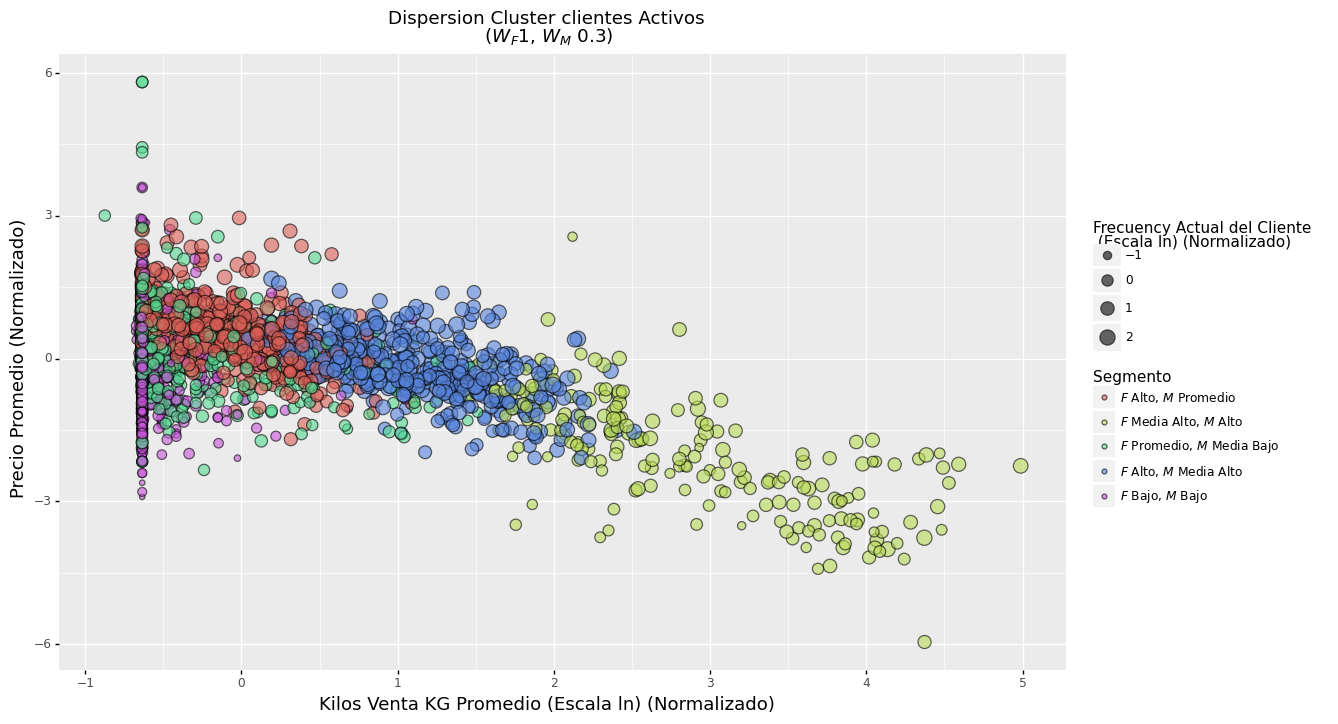

<ggplot: (108718092695)>

In [51]:
Y_G='Precio Promedio'
X_G='Kilos Venta KG Promedio'
rfm_clust_x['Frecuency Actual del Cliente'+'\n (Escala ln) (Normalizado)']=\
    rfm_clust_x['Frecuency Actual del Cliente'+' (Escala ln) (Normalizado)']
Z_G='Frecuency Actual del Cliente'
G_PQ_Clusters=(
    ggplot(
        R_FM_Func.data_Norm_satandar( R_FM_Func.data_ln(rfm_clust_x,[X_G,Z_G],False)
                                    ,[c+' (Escala ln)' for c in [X_G]] + [Y_G] ,False)
        #+' (Escala ln)'
        , aes(y=Y_G+' (Normalizado)'
            ,x=X_G+' (Escala ln)'+' (Normalizado)'
             ,fill='Segmento'
            # ,color='Segmento'
                     ))\
        #                 + labs(y='Disposición a pagar')\
            + geom_point(
                aes( size= Z_G +'\n (Escala ln) (Normalizado)'),
                #+' (Escala ln)'),
                # 'F-1'),
                # 'Frecuency Actual del Cliente'+'\n (Escala ln) (Normalizado)'),
                   
                    alpha=0.6)\
        #                 +geom_smooth()\
        #                 +ggtitle(('Dispersión Clusters Clientes'+
        #                           ' \n Disposición a pagar v/s '+
        #                          'Cluster de Semana'))\
        # +ylab('Monetary Actual'+'\n'+' (Escala ln) (Normalizado)')
        # +xlab('Frecuency'+'\n'+' (Escala ln) (Normalizado)')
        +ggtitle('Dispersion Cluster clientes '+
                rfm_clust_x['Actividad del cliente'].unique()[0]+'s'+
                 '\n ($W_F $'+str(w_f)+', $W_M$ '+str(w_m) +')'
                 )
        +theme(
            # axis_text_x = element_text(angle=0, hjust=0)
            figure_size=(13,8),
            axis_title_x=element_text(size = 13),
            axis_title_y=element_text(size = 13),
                )


    )
G_PQ_Clusters

In [52]:
Png_file_direct_Graphic_Canal_Material+"\\Cluster\\RFM"

'C:\\Users\\user\\Documents\\Graficos\\Canal Tradicional\\1010078\\Cluster\\RFM'

### SAVE

In [53]:
# ```python
#============================
# W_F y W_F con la dispersion de los clusters generados
#============================
file_name=('Disp PQ Clusters r+fm Activo')
    
pngfill= Png_file_direct_Graphic_Canal_Material+"\\Cluster\\RFM"

start_time = time.time()
save_as_pdf_pages(
                  
                  [ G_PQ_Clusters ]
                    ,pngfill 
            +"\\"+ file_name + ".pdf")
time_convert(time.time()-start_time)
# ```

c:\Users\user\anaconda3\lib\site-packages\plotnine\ggplot.py:820: PlotnineWarning: Filename: C:\Users\user\Documents\Graficos\Canal Tradicional\1010078\Cluster\RFM\Disp PQ Clusters r+fm Activo.pdf


Time Lapsed = 0:0:0.8427672386169434 
 H:m:s


# Graficos Presentación 

<!--  `rfm_clust_x=df_C_Customers.copy()` -->

>`df_C_fact`

>`df_C_Customers`

In [54]:
# df_C_Customers
df_C_fact.head(1)

,Cliente,Recency Actual,Frecuency Actual del Cliente,Monetary Actual,Actividad del cliente,Frecuency Actual del Cliente (Escala ln) (Normalizado),Monetary Actual (Escala ln) (Normalizado),$(F \times W_F + M \times W_M)$,identified_clusters,F-1,...,Año Creación,Material Favorito,Frecuencia Historica,Mes_num,Recency,Frecuency_Row,Ingreso de Venta CLP,Monetary,Recency días,Segmento
0,10007508,0,0.201752,117683.471154,Activo,1.839562,1.409578,2.262435,3,4.95657,...,2007,1020253,464,1,32 days,0,75900,80942,32,"$F$ Alto, $M$ Media Alto"


## Volumen de venta para cada mes de cada año


### Procedimeitno % Del volumenm

In [55]:
df_C_fact.Mes.unique()

array(['Enero', 'Diciembre', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
       'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre'],
      dtype=object)

In [56]:
data_rfm.head()

,Semana,Tipo de Semana,Material (Nombre),Kilos Venta KG,Precio,Día natural,Día Semana,Mes,Año,Población,...,Categoría Cliente,Año Creación,Material Favorito,Frecuencia Historica,Mes_num,Recency,Frecuency_Row,Ingreso de Venta CLP,Monetary,Recency días
0,1,3,1010078(Trutro Entero Selección),66,1150,2019-01-05,Sábado,Enero,2019,Puente Alto,...,Especialista en Crud,2007,1020253,464,1,32 days,0,75900,80942,32
1,1,3,1010078(Trutro Entero Selección),110,1400,2019-12-30,Lunes,Diciembre,2019,Puente Alto,...,Especialista en Crud,2007,1020253,464,12,11 days,0,154000,102739,11
2,1,3,1010078(Trutro Entero Selección),22,1313,2019-01-05,Sábado,Enero,2019,Paine,...,Emprendedores,2007,1010078,101,1,7 days,0,28886,29256,7
3,1,3,1010078(Trutro Entero Selección),22,1600,2020-01-04,Sábado,Enero,2020,Paine,...,Emprendedores,2007,1010078,101,1,14 days,0,35200,28887,14
4,1,3,1010078(Trutro Entero Selección),132,1190,2019-01-04,Viernes,Enero,2019,Huechuraba,...,Especialista en Crud,2007,1010078,226,1,7 days,0,157080,116452,7


In [57]:
#====================================================================================
# Ventas  de cada mes
#====================================================================================
# mes_in='Enero'
# ano_in=2019
df_i_Full=data_rfm.copy()
df_i=df_C_fact.copy()
#==========================================================
# Defino el primer meses y año
#==========================================================

DF_Volumen_total=df_i_Full.groupby(['Año','Mes'],sort=True).sum()['Kilos Venta KG'].reset_index()
DF_Volumen_total=\
    DF_Volumen_total.rename(columns={'Kilos Venta KG':'Volumen Total KG'})
DF_Volumen_total.head()

,Año,Mes,Volumen Total KG
0,2018,Abril,221184
1,2018,Agosto,258827
2,2018,Diciembre,295518
3,2018,Enero,213826
4,2018,Febrero,153430


In [58]:
#====================================================================================
# Ventas  de cada mes Segmentos
#====================================================================================

#-----------------------------------------------------------------------------------
# total
DF_Volumen_Cluster=df_i.groupby(['Año',
                                    'Mes','Segmento'],sort=True)\
        .sum()['Kilos Venta KG'].reset_index()

DF_Volumen_Cluster=\
    DF_Volumen_Cluster.rename(columns={'Kilos Venta KG':'Volumen de venta \n total del Segmento KG'})

DF_Volumen_Cluster=pd.merge(DF_Volumen_Cluster,DF_Volumen_total,how='left')

DF_Volumen_Cluster['Porcentaje de las ventas %']=DF_Volumen_Cluster.apply(lambda x: 
np.round((x['Volumen de venta \n total del Segmento KG'] / x['Volumen Total KG'])*100,2)
,axis=1)
DF_Volumen_Cluster['Mes_num']=DF_Volumen_Cluster.Mes.apply(lambda x: Month_NUM_dic[x]).astype('int64')
DF_Volumen_Cluster.head()


Mean_DF_Volumen_Cluster=DF_Volumen_Cluster.groupby([ 'Mes','Segmento']).mean().reset_index()
Mean_DF_Volumen_Cluster.Mes_num\
            =Mean_DF_Volumen_Cluster.Mes_num.astype('int64')
Mean_DF_Volumen_Cluster.head()

,Mes,Segmento,Volumen de venta \n total del Segmento KG,Volumen Total KG,Porcentaje de las ventas %,Mes_num
0,Abril,"$F$ Alto, $M$ Promedio",46355.25,399058.25,11.3000,4
1,Abril,"$F$ Media Alto, $M$ Alto",148276.00,399058.25,38.4575,4
2,Abril,"$F$ Promedio, $M$ Media Bajo",12377.50,399058.25,2.7375,4
3,Abril,"$F$ Alto, $M$ Media Alto",151362.50,399058.25,37.0750,4
4,Abril,"$F$ Bajo, $M$ Bajo",5284.75,399058.25,1.1175,4


In [59]:
Mean_DF_Volumen_Cluster.dtypes

Mes                                            object
Segmento                                     category
Volumen de venta \n total del Segmento KG     float64
Volumen Total KG                              float64
Porcentaje de las ventas %                    float64
Mes_num                                         int64
dtype: object

c:\Users\user\anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 10 rows containing missing values.
c:\Users\user\anaconda3\lib\site-packages\plotnine\geoms\geom_path.py:75: PlotnineWarning: geom_path: Removed 2 rows containing missing values.


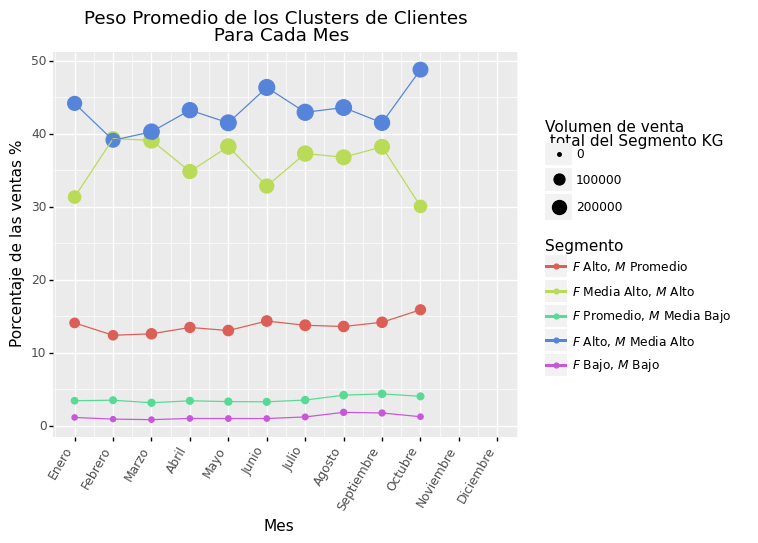

<ggplot: (108720804015)>

In [60]:
X_brak=[i for i in range(1,13)]
X_brak_S=[Mes_name(i) for i in range(1,13)]
GRaph_Disp_cluster=(
    ggplot(     
            # Mean_DF_Volumen_Cluster
            DF_Volumen_Cluster[DF_Volumen_Cluster.Año=='2021']
                        ,aes(x='Mes_num',
                            y='Porcentaje de las ventas %'
                            # 'Volumen de venta \n total del Segmento KG'
                            ,color='Segmento'
                    ))\
                + geom_point( aes(size= 'Volumen de venta \n total del Segmento KG')
                    )
                                # Porcentaje promedio de \n   las ventas del mes [%]'
                 + geom_line()#aes(color='Cluster de Clientes'))\
                + labs(#y='',
                        x='Mes')\
                +ggtitle(('Peso Promedio de los Clusters de Clientes'+' \n Para Cada Mes'))\

                +theme(axis_text_x = element_text(angle=60, hjust=1)
                       ,figure_size=(6,5))
                 + scale_x_continuous(breaks=X_brak,labels=X_brak_S)
    )
GRaph_Disp_cluster

### Grafico a usar

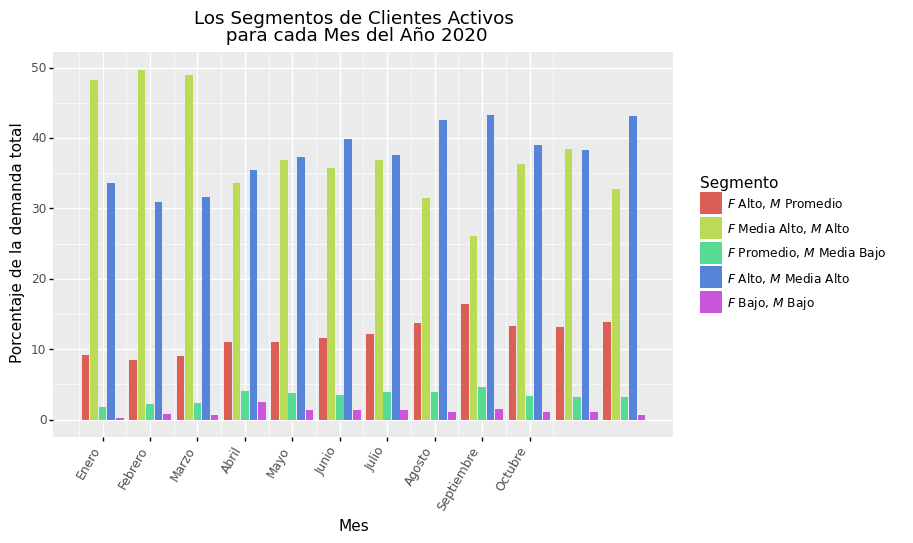

<ggplot: (108721282079)>

In [61]:
X_brak=[i for i in range(1,11)]
X_brak_S=[Mes_name(i) for i in range(1,11)]
Año_G='2020'
GRaph_Disp_cluster=(
    ggplot(     
            # Mean_DF_Volumen_Cluster
            DF_Volumen_Cluster[DF_Volumen_Cluster.Año==Año_G]
                        ,aes(x='Mes_num',
                            y='Porcentaje de las ventas %'
                            # 'Volumen de venta \n total del Segmento KG'
                            ,fill='Segmento'
                    ))\
                +geom_col(position = "dodge2")
                    # position = position_dodge2(preserve = "single") )
                + labs(y='Porcentaje de la demanda total',
                        x='Mes')\
                +ggtitle(( #'Incluencia en la demanda de '
                            'Los Segmentos de Clientes Activos'
                            +'\n para cada Mes del Año '+ Año_G ))\

                +theme(axis_text_x = element_text(angle=60, hjust=1)
                       ,figure_size=(8,5))
                 + scale_x_continuous(breaks=X_brak,labels=X_brak_S)
    )
GRaph_Disp_cluster

## Cantidad de clientes grafica

### Totales

In [62]:
col_Clust='identified_clusters'
# Clientes que no poseen cluster
Cant_clientes_sin_clust=\
len(DF_ventas[DF_ventas[col_Clust].isnull()
             ].copy()['Cliente - Local.1'].unique())

#Numero total de clientes
N_total_clientes=len(data['Cliente - Local.1'].unique())

x=Cluster.groupby('identified_clusters').count()['Cliente - Local.1']

x_p=[x[i]/(N_total_clientes)*100for i in range(len(list(x)))]
x_p=[ str("%.2f" % round(x_p[i],2)+' %')  for i in range(len(list(x)))]

#DF de los clientes que tiene cluster
a=pd.DataFrame({'Cluster de Clientes':list(x.index)
              ,'Cantidad de clientes':list(x)
                ,'Porcentaje de los clientes':x_p
                
               })
a['Cantidad de clientes']=a['Cantidad de clientes'].astype('int64')

#DF de los sin custer
b=pd.DataFrame({'Cluster de Clientes':['Sin Cluster']
              ,'Cantidad de clientes':[Cant_clientes_sin_clust]
                ,'Porcentaje de los clientes':[
                     str("%.2f" % round((Cant_clientes_sin_clust/N_total_clientes)*100,2)+' %')
                ]
                
               })

b['Cantidad de clientes']=b['Cantidad de clientes'].astype('int64')

z=pd.concat([a,b])


Gplot=(
        ggplot(z, aes(x='Cluster de Clientes',y='Cantidad de clientes'
                         ))\
                    #+ geom_point()\
                    + geom_col(fill='blue')\
                    +ggtitle('Cantidad de Clientes '+' \n Por Cluster')\
                    + labs(x='Cluster de Clientes')
                   #+theme(axis_text_x = element_text(angle=90, hjust=1))\

        + geom_text(aes(label='Porcentaje de los clientes'),   # new
         position=position_dodge(width=0.9),
         size=8, va='bottom')
            
        + geom_text(aes(label='Cantidad de clientes'),   # new
         position=position_dodge(width=0.9),
         size=8, va='top',ha='center',color='red')
            )
Gplot

NameError: name 'DF_ventas' is not defined

## Incorporación mensual durante el año 2021

In [ ]:
X_brak=[i for i in range(1,13)]
X_brak_S=[str(i) for i in range(1,13)]
GRaph_Disp_cluster=(
    ggplot(Cluster_df_vol, aes(x='Mes',
                               y= 'Cantidad de clientes del cluster'))\
                #+ labs(y='Disposición a pagar',x='Tipo de Semana')\
                + geom_point(aes(color='Cluster de Clientes'
                     ))\
                 + geom_line(aes(color='Cluster de Clientes'))\
                +ggtitle(('Peso Promedio de los Clusters de Clientes'+
                          ' \n Para Cada Semana'))\
                #+theme(axis_text_x = element_text(angle=90, hjust=1))
                       #,figure_size=(15,8)
                 + scale_x_continuous(breaks=X_brak,labels=X_brak_S)
    )
GRaph_Disp_cluster

### Porcentaje de los clientes de cada segmento activo

In [ ]:
X_brak=[i for i in range(1,13)]
X_brak_S=[str(i) for i in range(1,13)]
GRaph_Disp_cluster=(
    ggplot(Cluster_df_vol, aes(x='Mes',
                               y='Porcentaje de \n los Clientes'))\
                #+ labs(y='Disposición a pagar',x='Tipo de Semana')\
                + geom_point(aes(color='Cluster de Clientes',size='Cantidad de Clientes'
                     ))\
                 + geom_line(aes(color='Cluster de Clientes'))\
                +ggtitle(('Cantidad de Clientes del Clusters '+
                         ' \n que Compran en Cada Mes'))\
                #+theme(axis_text_x = element_text(angle=90, hjust=1))
                       #,figure_size=(15,8)
                 + scale_x_continuous(breaks=X_brak,labels=X_brak_S)
    )
GRaph_Disp_cluster

## Precio promedio ponderado

In [ ]:
X_brak=[i for i in range(1,13)]
X_brak_S=[str(i) for i in range(1,13)]
X_df=df_prom#[df_prom['Cluster de Clientes']!='Sin Cluster']
GRaph_Disp_cluster=(
    ggplot(X_df
           , aes(x='Mes',
                               y='Precio promedio CLP '))\
                #+ labs(y='Disposición a pagar',x='Tipo de Semana')\
                + geom_point(aes(color='Cluster de Clientes',size='Toneladas de Venta TG Total'
                     ))\
                 + geom_line(aes(color='Cluster de Clientes'))\
                +ggtitle(('Precio Promedio mensual '+
                         ' \n de los Clusters '))\
                #+theme(axis_text_x = element_text(angle=90, hjust=1))
                       #,figure_size=(15,8)
                 + scale_x_continuous(breaks=X_brak,labels=X_brak_S)
    )
GRaph_Disp_cluster

# Puntuación del cluster


## Ridge Regresion

Se busca considerar el coeficiente que acompaña a cada segmento de clientes, para decidir que segmento es el que representa un aumento del precio

In [ ]:
data_rfm
for a in R_FM_Customers.keys():
    print(R_FM_Func.Func_log_log_Tip_ind_cluster(pd.merge(R_FM_Customers[a],data_rfm,how='left'),True))

(0.473, 0.463)
(0.446, 0.45)
(0.417, 0.464)


In [ ]:
Col_Ajuste_otras_var=[
        '%△Valoración Promedio \n Tipo de Semana 0 (Normalizado)',
        '%△Valoración Promedio \n Tipo de Semana 1 (Normalizado)',
        '%△Valoración Promedio \n Tipo de Semana 2 (Normalizado)',
        '%△Valoración Promedio \n Tipo de Semana 3 (Normalizado)',
        '%△Valoración Promedio \n Tipo de Semana 4 (Normalizado)',

        # 'Kilos Venta KG Promedio \n Tipo de Semana 0 (Escala ln) (Normalizado)',
        # 'Kilos Venta KG Promedio \n Tipo de Semana 1 (Escala ln) (Normalizado)',
        # 'Kilos Venta KG Promedio \n Tipo de Semana 2 (Escala ln) (Normalizado)',
        # 'Kilos Venta KG Promedio \n Tipo de Semana 3 (Escala ln) (Normalizado)',
        # 'Kilos Venta KG Promedio \n Tipo de Semana 4 (Escala ln) (Normalizado)',

        'Ticket Promedio Actual (Escala ln) (Normalizado)',
        'Ticket CV Actual (Escala ln) (Normalizado)'
       ]

In [ ]:
Col_X_test_rfm=[
    'Frecuency Actual del Cliente (Escala ln) (Normalizado)',
       'Monetary Actual (Escala ln) (Normalizado)',
       '$(F \times W_F + M \times W_M)$']

Lis_curv_G=[]
for a_i in R_FM_Customers.keys(): 
    X_rfm= \
        pd.merge(R_FM_Customers[a_i],
                Ajuste_total(Data_Customers_Full)[0],how='left'
                )[['Cliente']+Col_X_test_rfm + Col_Ajuste_otras_var]
    # X_rfm=np.array(X_rfm)
    # R_FM_Func.Curva_kmeans(X_rfm,[Col_X_test_rfm + Col_Ajuste_otras_var],)[0]
    X_KM=R_FM_Func.def_Col_cluster(X_rfm, 
            (Col_X_test_rfm + Col_Ajuste_otras_var)
                ,Numero_de_clusters=5)
    print(R_FM_Func.Func_log_log_Tip_ind_cluster(pd.merge(X_KM,data_rfm,how='left'),True))
    

(0.483, 0.474)
(0.481, 0.482)
(0.577, 0.61)


## Sklearns

[Sklearns links](https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation)

###  Silhouette Coefficient 2.3.10.5.

#### Apuntes

Si no se conocen las etiquetas de verdad del terreno, la evaluación debe realizarse utilizando el propio modelo. El Coeficiente de silueta (sklearn.metrics.silhouette_score) es un ejemplo de tal evaluación, donde una puntuación más alta del Coeficiente de silueta se relaciona con un modelo con clústeres mejor definidos. El Coeficiente de Silueta se define para cada muestra y se compone de dos puntuaciones:

- a: The mean distance between a sample and all other points in the same class.

- b: The mean distance between a sample and all other points in the next nearest cluster.

El Coeficiente de silueta s para una sola muestra se da como:

<!-- \begine{equation} -->
$s = \frac{b - a}{max(a, b)}$
<!-- \end{equation} -->
The Silhouette Coefficient for a set of samples is given as the mean of the Silhouette Coefficient for each sample.

El Coeficiente de silueta para un conjunto de muestras se proporciona como la media del Coeficiente de silueta para cada muestra.

```python
>>> from sklearn import metrics
>>> from sklearn.metrics import pairwise_distances
>>> from sklearn import datasets
>>> X, y = datasets.load_iris(return_X_y=True)
```

In normal usage, the Silhouette Coefficient is applied to the results of a cluster analysis.

En uso normal, el Coeficiente de silueta se aplica a los resultados de un análisis de conglomerados.

```python
>>> import numpy as np
>>> from sklearn.cluster import KMeans
>>> kmeans_model = KMeans(n_clusters=3, random_state=1).fit(X)
>>> labels = kmeans_model.labels_
>>> metrics.silhouette_score(X, labels, metric='euclidean')
0.55...
```

References

Peter J. Rousseeuw (1987). “Silhouettes: a Graphical Aid to the Interpretation and Validation of Cluster Analysis” . Computational and Applied Mathematics 20: 53–65.

Advantages
- The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.

- The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.}


Ventajas 
La puntuación está limitada entre -1 para un agrupamiento incorrecto y +1 para un agrupamiento muy denso. Las puntuaciones alrededor de cero indican grupos superpuestos.

La puntuación es más alta cuando los conglomerados son densos y bien separados, lo que se relaciona con un concepto estándar de conglomerado.

Drawbacks
- The Silhouette Coefficient is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN.

Inconvenientes 
- El coeficiente de silueta es generalmente más alto para los clústeres convexos que para otros conceptos de clústeres, como los clústeres basados ​​en la densidad como los obtenidos a través de DBSCAN.

#### Ejecución

In [ ]:
R_FM_Customers.keys()

dict_keys(['Activo', 'Fugandose', 'Fugando'])

In [ ]:
# for a in R_FM_Customers.keys():
pd.merge(R_FM_Customers['Activo'],Data_Customers_Full ,how='left').columns

Index(['Cliente', 'Recency Actual', 'Frecuency Actual del Cliente',
       'Monetary Actual', 'Actividad del cliente',
       'Frecuency Actual del Cliente (Escala ln) (Normalizado)',
       'Monetary Actual (Escala ln) (Normalizado)',
       '$(F \times W_F + M \times W_M)$', 'identified_clusters', 'F-1',
       '%△Valoración Promedio \n Tipo de Semana 0',
       '%△Valoración Promedio \n Tipo de Semana 1',
       '%△Valoración Promedio \n Tipo de Semana 2',
       '%△Valoración Promedio \n Tipo de Semana 3',
       '%△Valoración Promedio \n Tipo de Semana 4',
       'Kilos Venta KG Promedio \n Tipo de Semana 0',
       'Kilos Venta KG Promedio \n Tipo de Semana 1',
       'Kilos Venta KG Promedio \n Tipo de Semana 2',
       'Kilos Venta KG Promedio \n Tipo de Semana 3',
       'Kilos Venta KG Promedio \n Tipo de Semana 4', 'Fecha ultima Compra',
       'Fecha Creacion', 'Kilos Venta KG Promedio', 'Precio Promedio',
       'Año Creación Promedio', 'Frecuencia Historica Promedio',
   

In [ ]:
a_i= 'Activo'
Col_X_test_rfm=[
    'Frecuency Actual del Cliente (Escala ln) (Normalizado)',
       'Monetary Actual (Escala ln) (Normalizado)',
       '$(F \times W_F + M \times W_M)$'
]
X_rfm=R_FM_Customers[a_i][Col_X_test_rfm]
# X_rfm=np.array(X_rfm)
y_rfm=R_FM_Customers[a_i].identified_clusters.to_list()

In [ ]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
# X, y = datasets.load_iris(return_X_y=True)

In [ ]:
# y_rfm

In [ ]:
# import numpy as np
# from sklearn.cluster import KMeans
# # kmeans_model = KMeans(n_clusters=5, random_state=1).fit(X)
# # labels = kmeans_model.labels_
# print(metrics.silhouette_score(X_rfm, y_rfm, metric='euclidean'))

0.42073356282959173


In [ ]:
from sklearn import metrics
# a_i= 'Activo'
Col_X_test_rfm=[
    'Frecuency Actual del Cliente (Escala ln) (Normalizado)',
       'Monetary Actual (Escala ln) (Normalizado)',
       '$(F \times W_F + M \times W_M)$'
]
for a_i in R_FM_Customers.keys(): 
    X_rfm=R_FM_Customers[a_i][Col_X_test_rfm]
    # X_rfm=np.array(X_rfm)
    y_rfm=R_FM_Customers[a_i].identified_clusters.to_list()
    print(a_i ,'\n silhouette_score',  np.round(metrics.silhouette_score(X_rfm, y_rfm, metric='euclidean' ),4) , '\n' )

Activo 
 silhouette_score 0.4207 

Fugandose 
 silhouette_score 0.4686 

Fugando 
 silhouette_score 0.6069 



### Resultado con todas las columnas

#### Función ajuste columnas 

In [ ]:
def Ajuste_total(data_x,Val=True):
    df=data_x.copy()
    Week_Val_Col_list=[
        '%△Valoración Promedio \n Tipo de Semana 0',
        '%△Valoración Promedio \n Tipo de Semana 1',
        '%△Valoración Promedio \n Tipo de Semana 2',
        '%△Valoración Promedio \n Tipo de Semana 3',
        '%△Valoración Promedio \n Tipo de Semana 4']
    Week_KG_Col_list=[
        'Kilos Venta KG Promedio \n Tipo de Semana 0',
        'Kilos Venta KG Promedio \n Tipo de Semana 1',
        'Kilos Venta KG Promedio \n Tipo de Semana 2',
        'Kilos Venta KG Promedio \n Tipo de Semana 3',
        'Kilos Venta KG Promedio \n Tipo de Semana 4']
    Ticket_Col_list=['Ticket Promedio Actual', 'Ticket CV Actual']
    df[Ticket_Col_list[1]]=df[Ticket_Col_list[1]].apply(lambda x: x+1)

    df=R_FM_Func.data_ln(
        df,
        Week_KG_Col_list+Ticket_Col_list
        ,drop_columns=True
    )

    df=R_FM_Func.data_Norm_satandar(df,
                                    Week_Val_Col_list
                                    + [ s + ' (Escala ln)' for s in Week_KG_Col_list]
                                    + [ s_i + ' (Escala ln)' for s_i in Ticket_Col_list]
                                    # + [Ticket_Col_list[0] + ' (Escala ln)' ,Ticket_Col_list[1] + ' (Escala ln)']
                                    ,drop_columns=True
     )

    Col_Ajuste_otras_var=[
        '%△Valoración Promedio \n Tipo de Semana 0 (Normalizado)',
        '%△Valoración Promedio \n Tipo de Semana 1 (Normalizado)',
        '%△Valoración Promedio \n Tipo de Semana 2 (Normalizado)',
        '%△Valoración Promedio \n Tipo de Semana 3 (Normalizado)',
        '%△Valoración Promedio \n Tipo de Semana 4 (Normalizado)',

        'Kilos Venta KG Promedio \n Tipo de Semana 0 (Escala ln) (Normalizado)',
        'Kilos Venta KG Promedio \n Tipo de Semana 1 (Escala ln) (Normalizado)',
        'Kilos Venta KG Promedio \n Tipo de Semana 2 (Escala ln) (Normalizado)',
        'Kilos Venta KG Promedio \n Tipo de Semana 3 (Escala ln) (Normalizado)',
        'Kilos Venta KG Promedio \n Tipo de Semana 4 (Escala ln) (Normalizado)',

        'Ticket Promedio Actual (Escala ln) (Normalizado)',
        'Ticket CV Actual (Escala ln) (Normalizado)'
       ]
    return (df,Col_Ajuste_otras_var)

array([[<AxesSubplot:title={'center':'%△Valoración Promedio \n Tipo de Semana 0 (Normalizado)'}>,
        <AxesSubplot:title={'center':'%△Valoración Promedio \n Tipo de Semana 1 (Normalizado)'}>,
        <AxesSubplot:title={'center':'%△Valoración Promedio \n Tipo de Semana 2 (Normalizado)'}>],
       [<AxesSubplot:title={'center':'%△Valoración Promedio \n Tipo de Semana 3 (Normalizado)'}>,
        <AxesSubplot:title={'center':'%△Valoración Promedio \n Tipo de Semana 4 (Normalizado)'}>,
        <AxesSubplot:title={'center':'Kilos Venta KG Promedio \n Tipo de Semana 0 (Escala ln) (Normalizado)'}>],
       [<AxesSubplot:title={'center':'Kilos Venta KG Promedio \n Tipo de Semana 1 (Escala ln) (Normalizado)'}>,
        <AxesSubplot:title={'center':'Kilos Venta KG Promedio \n Tipo de Semana 2 (Escala ln) (Normalizado)'}>,
        <AxesSubplot:title={'center':'Kilos Venta KG Promedio \n Tipo de Semana 3 (Escala ln) (Normalizado)'}>],
       [<AxesSubplot:title={'center':'Kilos Venta KG Promed

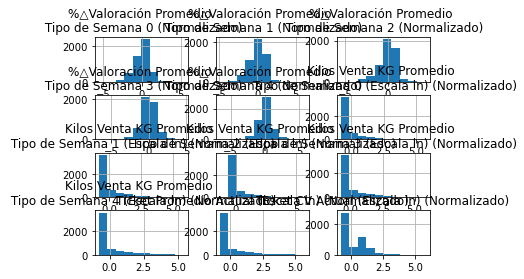

In [ ]:
Ajuste_total(Data_Customers_Full)[0][Ajuste_total(Data_Customers_Full)[1]].hist()


array([[<AxesSubplot:title={'center':'%△Valoración Promedio \n Tipo de Semana 0'}>,
        <AxesSubplot:title={'center':'%△Valoración Promedio \n Tipo de Semana 1'}>],
       [<AxesSubplot:title={'center':'%△Valoración Promedio \n Tipo de Semana 2'}>,
        <AxesSubplot:title={'center':'%△Valoración Promedio \n Tipo de Semana 3'}>],
       [<AxesSubplot:title={'center':'%△Valoración Promedio \n Tipo de Semana 4'}>,
        <AxesSubplot:>]], dtype=object)

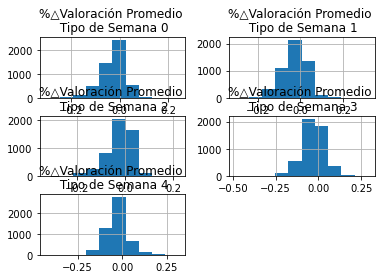

In [ ]:
Data_Customers_Full[
    Week_Val_Col_list
].hist()

array([[<AxesSubplot:title={'center':'Recency Actual'}>,
        <AxesSubplot:title={'center':'Frecuency Actual del Cliente'}>,
        <AxesSubplot:title={'center':'Monetary Actual'}>,
        <AxesSubplot:title={'center':'Frecuency Actual del Cliente (Escala ln) (Normalizado)'}>,
        <AxesSubplot:title={'center':'Monetary Actual (Escala ln) (Normalizado)'}>],
       [<AxesSubplot:title={'center':'$(F \times W_F + M \times W_M)$'}>,
        <AxesSubplot:title={'center':'F-1'}>,
        <AxesSubplot:title={'center':'%△Valoración Promedio \n Tipo de Semana 0'}>,
        <AxesSubplot:title={'center':'%△Valoración Promedio \n Tipo de Semana 1'}>,
        <AxesSubplot:title={'center':'%△Valoración Promedio \n Tipo de Semana 2'}>],
       [<AxesSubplot:title={'center':'%△Valoración Promedio \n Tipo de Semana 3'}>,
        <AxesSubplot:title={'center':'%△Valoración Promedio \n Tipo de Semana 4'}>,
        <AxesSubplot:title={'center':'Kilos Venta KG Promedio \n Tipo de Semana 0'}>,
     

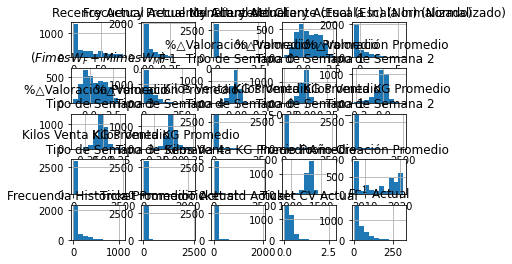

In [ ]:
pd.merge(R_FM_Customers['Activo'],Data_Customers_Full ,how='left').hist()




#### Aplicación con todas las columnas

In [ ]:
Ajuste_total(Data_Customers_Full)[0]\
            [Ajuste_total(Data_Customers_Full)[1]]#columnas de interes

In [ ]:
Col_Ajuste_otras_var=[
        '%△Valoración Promedio \n Tipo de Semana 0 (Normalizado)',
        '%△Valoración Promedio \n Tipo de Semana 1 (Normalizado)',
        '%△Valoración Promedio \n Tipo de Semana 2 (Normalizado)',
        '%△Valoración Promedio \n Tipo de Semana 3 (Normalizado)',
        '%△Valoración Promedio \n Tipo de Semana 4 (Normalizado)',

        'Kilos Venta KG Promedio \n Tipo de Semana 0 (Escala ln) (Normalizado)',
        'Kilos Venta KG Promedio \n Tipo de Semana 1 (Escala ln) (Normalizado)',
        'Kilos Venta KG Promedio \n Tipo de Semana 2 (Escala ln) (Normalizado)',
        'Kilos Venta KG Promedio \n Tipo de Semana 3 (Escala ln) (Normalizado)',
        'Kilos Venta KG Promedio \n Tipo de Semana 4 (Escala ln) (Normalizado)',

        'Ticket Promedio Actual (Escala ln) (Normalizado)',
        'Ticket CV Actual (Escala ln) (Normalizado)'
       ]

In [ ]:
from sklearn import metrics
# a_i= 'Activo'
Col_X_test_rfm=[
    'Frecuency Actual del Cliente (Escala ln) (Normalizado)',
       'Monetary Actual (Escala ln) (Normalizado)',
       '$(F \times W_F + M \times W_M)$']


for a_i in R_FM_Customers.keys(): 
    X_rfm= \
        pd.merge(R_FM_Customers[a_i],
                Ajuste_total(Data_Customers_Full)[0],how='left'
                )[Col_X_test_rfm + Col_Ajuste_otras_var]
    # X_rfm=np.array(X_rfm)
    
    y_rfm=R_FM_Customers[a_i].identified_clusters.to_list()

    print(a_i ,'\n silhouette_score',  np.round(metrics.silhouette_score(X_rfm, y_rfm, metric='euclidean' ),4) , '\n' )

Activo 
 silhouette_score 0.1265 

Fugandose 
 silhouette_score 0.0569 

Fugando 
 silhouette_score 0.0421 



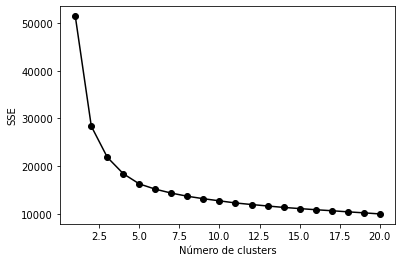

Activo 
 silhouette_score 0.221 



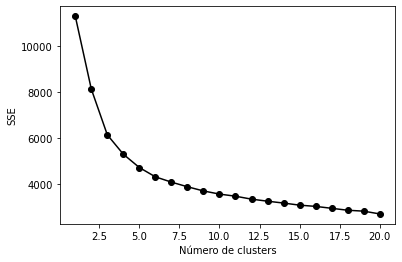

Fugandose 
 silhouette_score 0.2065 



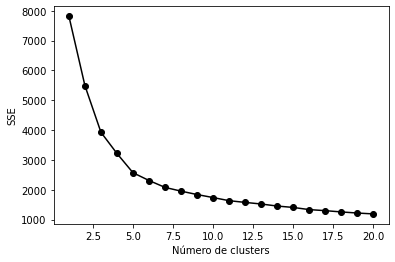

Fugando 
 silhouette_score 0.3183 



In [ ]:
# Prueba Clustering con todos los atributos
import numpy as np
from sklearn.cluster import KMeans
Col_X_test_rfm=[
    'Frecuency Actual del Cliente (Escala ln) (Normalizado)',
       'Monetary Actual (Escala ln) (Normalizado)',
       '$(F \times W_F + M \times W_M)$']

Lis_curv_G=[]
for a_i in R_FM_Customers.keys(): 
    X_rfm= \
        pd.merge(R_FM_Customers[a_i],
                Ajuste_total(Data_Customers_Full)[0],how='left'
                )[Col_X_test_rfm + Col_Ajuste_otras_var]
    # X_rfm=np.array(X_rfm)
    # R_FM_Func.Curva_kmeans(X_rfm,[Col_X_test_rfm + Col_Ajuste_otras_var],)[0]
    Lis_curv_G.append(R_FM_Func.Curva_kmeans(X_rfm,X_rfm.columns)[0])
    kmeans_model = KMeans(n_clusters=5, random_state=1).fit(X_rfm)
    labels = kmeans_model.labels_
    print(a_i ,'\n silhouette_score',  np.round(metrics.silhouette_score(X_rfm, labels, metric='euclidean' ),4) , '\n' )
    # print(,metrics.silhouette_score(X_rfm, labels, metric='euclidean'))

### Calinski-Harabasz Index  2.3.10.6. 

Si no se conocen las etiquetas de verdad del terreno, se puede usar el índice de Calinski-Harabasz ( sklearn.metrics.calinski_harabasz_score), también conocido como Criterio de relación de varianza, para evaluar el modelo, donde una puntuación más alta de Calinski-Harabasz se relaciona con un modelo con clústeres mejor definidos.

El índice es la relación de la suma de la dispersión entre conglomerados y la dispersión dentro del conglomerado para todos los conglomerados (donde la dispersión se define como la suma de las distancias al cuadrado):

```python
>>> from sklearn import metrics
>>> from sklearn.metrics import pairwise_distances
>>> from sklearn import datasets
>>> X, y = datasets.load_iris(return_X_y=True)
```

En uso normal, el índice de Calinski-Harabasz se aplica a los resultados de un análisis de conglomerados:

```python 
>>> import numpy as np
>>> from sklearn.cluster import KMeans
>>> kmeans_model = KMeans(n_clusters=3, random_state=1).fit(X)
>>> labels = kmeans_model.labels_
>>> metrics.calinski_harabasz_score(X, labels)
561.62...
```

Ventajas 
- La puntuación es más alta cuando los conglomerados son densos y bien separados, lo que se relaciona con un concepto estándar de conglomerado.

- La puntuación es rápida de calcular.

Inconvenientes 
- El índice de Calinski-Harabasz es generalmente más alto para los conglomerados convexos que para otros conceptos de conglomerados, como los conglomerados basados ​​en la densidad como los obtenidos a través de DBSCAN.

Formulación matemática 
- Para un conjunto de datos $E$ de tamaño $n_E$ que se ha agrupado en $k$ grupos, la puntuación de Calinski-Harabaszse define como la relación entre la dispersión media entre grupos y la dispersión dentro de los grupos:

$S=\dfrac{tr(B_k)}{tr(W_k)}\times\dfrac{n_E-k}{k-1}$

dónde $tr(B_k)$ es la traza de la matriz de dispersión entre grupos y $tr(W_k)$ es la traza de la matriz de dispersión dentro del grupo definida por:

$W_k= \sum_{q=1}^k  \sum_{x \in C_q} (x-c_q) (x- c_q)^T$

$B_k = \sum_{q=1}^k  n_q (c_q-c_E) (c_q- c_E)^T $

con $C_q$ el conjunto de puntos en cluster $q$, $c_q$ el centro del racimo $q$, $c_E$ el centro de $E$, y $n_q$ el número de puntos en el clúster $q$.

Referencias

Caliński, T. y Harabasz, J. (1974). “Un método de dendritas para el análisis de conglomerados” . Comunicaciones en Estadística-teoría y Métodos 3: 1-27 .

### Resultados

#### Solo columnas RFM

In [ ]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
# from sklearn import datasets
# X, y = datasets.load_iris(return_X_y=True)
# ```

# En uso normal, el índice de Calinski-Harabasz se aplica a los resultados de un análisis de conglomerados:

# import numpy as np
# from sklearn.cluster import KMeans
# # kmeans_model = KMeans(n_clusters=3, random_state=1).fit(X)
# labels = kmeans_model.labels_

Col_X_test_rfm=[
    'Frecuency Actual del Cliente (Escala ln) (Normalizado)',
       'Monetary Actual (Escala ln) (Normalizado)',
       '$(F \times W_F + M \times W_M)$']


for a_i in R_FM_Customers.keys(): 
    X_rfm= \
        pd.merge(R_FM_Customers[a_i],
                Ajuste_total(Data_Customers_Full)[0],how='left'
                )[Col_X_test_rfm 
                # + Col_Ajuste_otras_var
                ]
    # X_rfm=np.array(X_rfm)
    
    y_rfm=R_FM_Customers[a_i].identified_clusters.to_list()
    print(a_i ,'\n silhouette_score',  np.round(metrics.silhouette_score(X_rfm, y_rfm, metric='euclidean' ),4)  )
    print(' calinski_harabasz_score',  np.round(metrics.calinski_harabasz_score(X_rfm, y_rfm),4) , '\n' )

Activo 
 silhouette_score 0.4207
 calinski_harabasz_score 4630.2713 

Fugandose 
 silhouette_score 0.4686
 calinski_harabasz_score 1535.0454 

Fugando 
 silhouette_score 0.6069
 calinski_harabasz_score 818.152 



#### Todas las columnas 

In [ ]:
Col_Ajuste_otras_var=[
        '%△Valoración Promedio \n Tipo de Semana 0 (Normalizado)',
        '%△Valoración Promedio \n Tipo de Semana 1 (Normalizado)',
        '%△Valoración Promedio \n Tipo de Semana 2 (Normalizado)',
        '%△Valoración Promedio \n Tipo de Semana 3 (Normalizado)',
        '%△Valoración Promedio \n Tipo de Semana 4 (Normalizado)',

        'Kilos Venta KG Promedio \n Tipo de Semana 0 (Escala ln) (Normalizado)',
        'Kilos Venta KG Promedio \n Tipo de Semana 1 (Escala ln) (Normalizado)',
        'Kilos Venta KG Promedio \n Tipo de Semana 2 (Escala ln) (Normalizado)',
        'Kilos Venta KG Promedio \n Tipo de Semana 3 (Escala ln) (Normalizado)',
        'Kilos Venta KG Promedio \n Tipo de Semana 4 (Escala ln) (Normalizado)',

        'Ticket Promedio Actual (Escala ln) (Normalizado)',
        'Ticket CV Actual (Escala ln) (Normalizado)'
       ]

In [ ]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
# from sklearn import datasets
# X, y = datasets.load_iris(return_X_y=True)
# ```

# En uso normal, el índice de Calinski-Harabasz se aplica a los resultados de un análisis de conglomerados:

# import numpy as np
# from sklearn.cluster import KMeans
# # kmeans_model = KMeans(n_clusters=3, random_state=1).fit(X)
# labels = kmeans_model.labels_

Col_X_test_rfm=[
    'Frecuency Actual del Cliente (Escala ln) (Normalizado)',
       'Monetary Actual (Escala ln) (Normalizado)',
       '$(F \times W_F + M \times W_M)$']


for a_i in R_FM_Customers.keys(): 
    X_rfm= \
        pd.merge(R_FM_Customers[a_i],
                Ajuste_total(Data_Customers_Full)[0],how='left'
                )[Col_X_test_rfm 
                + Col_Ajuste_otras_var
                ]
    # X_rfm=np.array(X_rfm)
    
    y_rfm=R_FM_Customers[a_i].identified_clusters.to_list()
    print(a_i ,'\n silhouette_score',  np.round(metrics.silhouette_score(X_rfm, y_rfm, metric='euclidean' ),4) )
    print(' calinski_harabasz_score',  np.round(metrics.calinski_harabasz_score(X_rfm, y_rfm),4) , '\n' )

Activo 
 silhouette_score 0.1265
 calinski_harabasz_score 1304.7967 

Fugandose 
 silhouette_score 0.0569
 calinski_harabasz_score 202.4586 

Fugando 
 silhouette_score 0.0421
 calinski_harabasz_score 71.815 



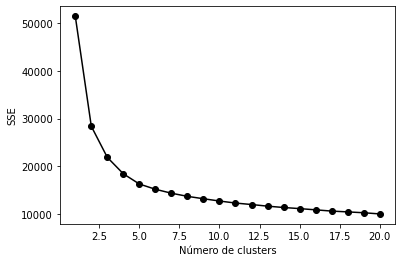

Activo Numero de clusters  5  
 silhouette_score 0.221
calinski_harabasz_score 1735.3293 



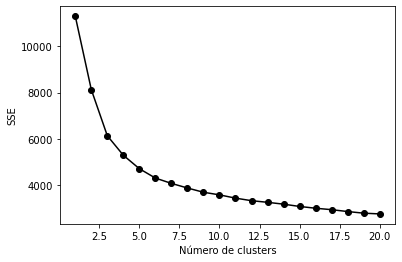

Fugandose Numero de clusters  5  
 silhouette_score 0.2065
calinski_harabasz_score 429.6482 



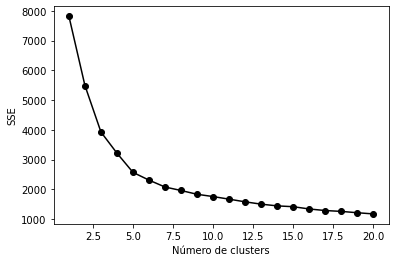

Fugando Numero de clusters  5  
 silhouette_score 0.3183
calinski_harabasz_score 313.6039 



In [ ]:
# Prueba Clustering con todos los atributos
import numpy as np
from sklearn.cluster import KMeans
Numero_Clusters=5
Col_X_test_rfm=[
    'Frecuency Actual del Cliente (Escala ln) (Normalizado)',
       'Monetary Actual (Escala ln) (Normalizado)',
       '$(F \times W_F + M \times W_M)$']

Lis_curv_G=[]
for a_i in R_FM_Customers.keys(): 
    X_rfm= \
        pd.merge(R_FM_Customers[a_i],
                Ajuste_total(Data_Customers_Full)[0],how='left'
                )[Col_X_test_rfm + Col_Ajuste_otras_var]
    # X_rfm=np.array(X_rfm)
    # R_FM_Func.Curva_kmeans(X_rfm,[Col_X_test_rfm + Col_Ajuste_otras_var],)[0]
    Lis_curv_G.append(R_FM_Func.Curva_kmeans(X_rfm,X_rfm.columns)[0])
    kmeans_model = KMeans(n_clusters=Numero_Clusters, random_state=1).fit(X_rfm)
    labels = kmeans_model.labels_
    print(a_i ,'Numero de clusters ',Numero_Clusters,' \n silhouette_score', 
     np.round(metrics.silhouette_score(X_rfm, labels, metric='euclidean' ),4) )
    print('calinski_harabasz_score',  np.round(metrics.calinski_harabasz_score(X_rfm, labels),4) , '\n' )
    # print(,metrics.silhouette_score(X_rfm, labels, metric='euclidean'))

### Índice Davies-Bouldin 2.3.10.7.

Si no se conocen las etiquetas de verdad del terreno, sklearn.metrics.davies_bouldin_scorese puede usar el índice de Davies-Bouldin ( ) para evaluar el modelo, donde un índice de Davies-Bouldin más bajo se relaciona con un modelo con una mejor separación entre los grupos.

Este índice significa la 'similitud' promedio entre grupos, donde la similitud es una medida que compara la distancia entre grupos con el tamaño de los grupos mismos.

Cero es la puntuación más baja posible. Los valores más cercanos a cero indican una mejor partición.

En uso normal, el índice de Davies-Bouldin se aplica a los resultados de un análisis de conglomerados de la siguiente manera:

>```python
> from sklearn import datasets
> iris = datasets.load_iris()
> X = iris.data
> from sklearn.cluster import KMeans
> from sklearn.metrics import davies_bouldin_score
> kmeans = KMeans(n_clusters=3, random_state=1).fit(X)
> labels = kmeans.labels_
> davies_bouldin_score(X, labels)
0.6619...
```

Ventajas 
- El cálculo de Davies-Bouldin es más simple que el de las puntuaciones de Silhouette.

- El índice se basa únicamente en cantidades y características inherentes al conjunto de datos, ya que su cálculo solo utiliza distancias puntuales.

Inconvenientes 
- El índice de Davies-Boulding es generalmente más alto para los conglomerados convexos que para otros conceptos de conglomerados, como los conglomerados basados ​​en densidad como los obtenidos de DBSCAN.

- El uso de la distancia centroide limita la métrica de distancia al espacio euclidiano.

Formulación matemática 

El índice se define como la similitud promedio entre cada grupo pory su mas parecido. En el contexto de este índice, la similitud se define como una medidaque se intercambia:

>The index is defined as the average similarity between each cluster  for  and its most similar one . In the context of this index, similarity is defined as a measure  that trades off:

, la distancia promedio entre cada punto del grupoy el centroide de ese grupo, también conocido como diámetro del grupo.

, la distancia entre los centroides de los gruposy.

Una opción simple para construirpara que sea no negativo y simétrico es:

 
Entonces el índice de Davies-Bouldin se define como:

 
 



Referencias

Davies, David L.; Bouldin, Donald W. (1979). "Una medida de separación de grupos" Transacciones IEEE sobre análisis de patrones e inteligencia artificial. PAMI-1 (2): 224-227.

Halkidi, María; Batistakis, Yannis; Vazirgiannis, Michalis (2001). “Sobre técnicas de validación de agrupamiento” Journal of Intelligent Information Systems, 17(2-3), 107-145.

Entrada de Wikipedia para el índice de Davies-Bouldin .


### Resultados

In [ ]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score
# from sklearn import datasets
# X, y = datasets.load_iris(return_X_y=True)
# ```

# En uso normal, el índice de Calinski-Harabasz se aplica a los resultados de un análisis de conglomerados:

# import numpy as np
# from sklearn.cluster import KMeans
# # kmeans_model = KMeans(n_clusters=3, random_state=1).fit(X)
# labels = kmeans_model.labels_

Col_X_test_rfm=[
    'Frecuency Actual del Cliente (Escala ln) (Normalizado)',
       'Monetary Actual (Escala ln) (Normalizado)',
       '$(F \times W_F + M \times W_M)$']


for a_i in R_FM_Customers.keys(): 
    X_rfm= \
        pd.merge(R_FM_Customers[a_i],
                Ajuste_total(Data_Customers_Full)[0],how='left'
                )[Col_X_test_rfm 
                # + Col_Ajuste_otras_var
                ]
    # X_rfm=np.array(X_rfm)
    
    y_rfm=R_FM_Customers[a_i].identified_clusters.to_list()

    print(a_i ,'\n silhouette_score',  np.round(metrics.silhouette_score(X_rfm, y_rfm, metric='euclidean' ),4) )
    print(' calinski_harabasz_score',  np.round(metrics.calinski_harabasz_score(X_rfm, y_rfm),4) , )
    print(' davies_bouldin_score',  np.round(metrics.davies_bouldin_score(X_rfm, y_rfm),4) , '\n' )

Activo 
 silhouette_score 0.4207
 calinski_harabasz_score 4630.2713
 davies_bouldin_score 0.8307 

Fugandose 
 silhouette_score 0.4686
 calinski_harabasz_score 1535.0454
 davies_bouldin_score 0.7419 

Fugando 
 silhouette_score 0.6069
 calinski_harabasz_score 818.152
 davies_bouldin_score 0.6782 



In [ ]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score
# from sklearn import datasets
# X, y = datasets.load_iris(return_X_y=True)
# ```

# En uso normal, el índice de Calinski-Harabasz se aplica a los resultados de un análisis de conglomerados:

# import numpy as np
# from sklearn.cluster import KMeans
# # kmeans_model = KMeans(n_clusters=3, random_state=1).fit(X)
# labels = kmeans_model.labels_

Col_X_test_rfm=[
    'Frecuency Actual del Cliente (Escala ln) (Normalizado)',
       'Monetary Actual (Escala ln) (Normalizado)',
       '$(F \times W_F + M \times W_M)$']


for a_i in R_FM_Customers.keys(): 
    X_rfm= \
        pd.merge(R_FM_Customers[a_i],
                Ajuste_total(Data_Customers_Full)[0],how='left'
                )[Col_X_test_rfm 
                + Col_Ajuste_otras_var
                ]
    # X_rfm=np.array(X_rfm)
    
    y_rfm=R_FM_Customers[a_i].identified_clusters.to_list()

    print(a_i ,'\n silhouette_score',  np.round(metrics.silhouette_score(X_rfm, y_rfm, metric='euclidean' ),4) )
    print(' calinski_harabasz_score',  np.round(metrics.calinski_harabasz_score(X_rfm, y_rfm),4) , )
    print(' davies_bouldin_score',  np.round(metrics.davies_bouldin_score(X_rfm, y_rfm),4) , '\n' )

Activo 
 silhouette_score 0.1265
 calinski_harabasz_score 1304.7967
 davies_bouldin_score 1.9343 

Fugandose 
 silhouette_score 0.0569
 calinski_harabasz_score 202.4586
 davies_bouldin_score 2.5074 

Fugando 
 silhouette_score 0.0421
 calinski_harabasz_score 71.815
 davies_bouldin_score 3.1101 



```
Activo Numero de clusters  10  
 silhouette_score 0.1603
calinski_harabasz_score 703.3304
 davies_bouldin_score 1.563
 ```

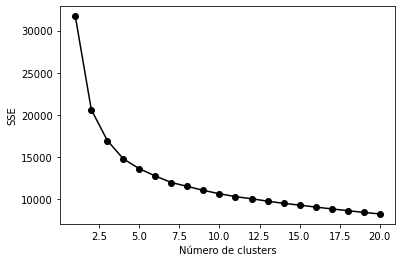

Activo Numero de clusters  7  
 silhouette_score 0.1675
calinski_harabasz_score 879.1529
 davies_bouldin_score 1.5386 



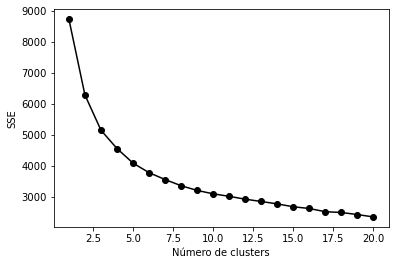

Fugandose Numero de clusters  7  
 silhouette_score 0.1713
calinski_harabasz_score 296.4071
 davies_bouldin_score 1.4725 



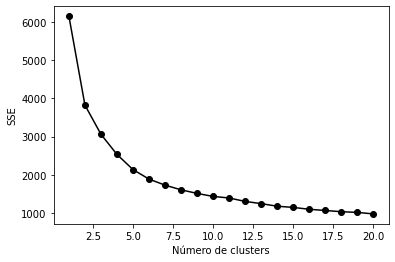

Fugando Numero de clusters  7  
 silhouette_score 0.3001
calinski_harabasz_score 259.3562
 davies_bouldin_score 1.1218 



In [ ]:
# Prueba Clustering con todos los atributos
import numpy as np
from sklearn.cluster import KMeans
Numero_Clusters=7
Col_X_test_rfm=[
    'Frecuency Actual del Cliente (Escala ln) (Normalizado)',
       'Monetary Actual (Escala ln) (Normalizado)',
       '$(F \times W_F + M \times W_M)$']

Lis_curv_G=[]
for a_i in R_FM_Customers.keys(): 
    X_rfm= \
        pd.merge(R_FM_Customers[a_i],
                Ajuste_total(Data_Customers_Full)[0],how='left'
                )[Col_X_test_rfm + Col_Ajuste_otras_var]
    # X_rfm=np.array(X_rfm)
    # R_FM_Func.Curva_kmeans(X_rfm,[Col_X_test_rfm + Col_Ajuste_otras_var],)[0]
    Lis_curv_G.append(R_FM_Func.Curva_kmeans(X_rfm,X_rfm.columns)[0])
    kmeans_model = KMeans(n_clusters=Numero_Clusters, random_state=1).fit(X_rfm)
    labels = kmeans_model.labels_
    print(a_i ,'Numero de clusters ',Numero_Clusters,' \n silhouette_score', 
     np.round(metrics.silhouette_score(X_rfm, labels, metric='euclidean' ),4) )
    print('calinski_harabasz_score',  np.round(metrics.calinski_harabasz_score(X_rfm, labels),4)  )
    print(' davies_bouldin_score',  np.round(metrics.davies_bouldin_score(X_rfm, labels),4) , '\n' )
